# Data Mining Versuch Clustering von Pokemon

* Autoren: Manuel Eberhardinger, Johannes Theodoridis

## Abgabe:

- **Abzugeben ist das Jupyter Notebook mit dem verlangten Implementierungen und den entsprechenden Ausgaben.**
- **Das Notebook ist als .ipynb und als .html abzugeben.**
- **Klausurelevante Fragen sind Dokument "Fragenkatalog Datamining" zu finden.**
- Antworten auf Fragen im Notebook, Diskussionen und Beschreibung der Ergebnisse sind optional (aber empfohlen) und werden nicht bewertet.

* [Übersicht Data Mining Praktikum](https://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)


# Einführung

## Lernziele:

In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Kennenlernen der Pokemon API
* Abfrage von Pokemon-Merkmalen über die API (Data Collection)
* Erstellen der Features für Pokemons (Feature Extraction + Data Preprocessing)
* Kennenlernen verschiedener Clustering-Algorithmen 
* Selektion der aussagekräftigsten Merkmale (Feature Selection)
* Clustering von ähnlichen Pokemons


## Vor dem Versuch zu klärende Fragen

### Kennenlernen der Pokemon API

In diesem Versuch wird die [Pokemon API](https://pokeapi.co/docs/v2) eingesetzt, um Features für verschiedene Pokemon über den [API Endpoint](https://pokeapi.co/docs/v2#pokemon) zu bekommen. Die API ist öffentlich verfügbar und man braucht somit keinen Account um Daten abfragen zu können. In diesem Versuch wollen wir keine fertige Library benutzen, die Daten für uns abfragen kann, sondern holen diese Daten mit der [requests](https://requests.readthedocs.io/en/latest/) Python-Bibliothek selber. 

1. Machen Sie sich mit der Pokemon API vertraut, speziell mit dem Pokemon endpoint. Diesen finden Sie über das Menü auf der Webseite: `Contents -> Pokémon -> Pokémon`.
2. Installieren Sie die Python-Bibliothek `requests` mit pip und führen Sie manuell ein paar beispielhafte Abfragen der Pokemon API durch. Benutzen Sie hierzu die `get` methode von requests mit einer endpoint URL. Eine Authentifizierung ist nicht notwendig. Versuchen Sie verschiedene IDs oder Namen aus und geben Sie den Statuscode sowie den Inhalt der response als Text oder JSON aus.
3. Welchen Python Datentyp liefert die Methoden `.json()` einer requests-Response zurück?

In [188]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import requests
import matplotlib.pyplot as plt

___
2:

In [189]:
request = requests.get("https://pokeapi.co/api/v2/pokeathlon-stat/2")

print(f"Status: {request.status_code}")
print("JSON:")
print(request.json())


Status: 200
JSON:
{'affecting_natures': {'decrease': [{'max_change': -2, 'nature': {'name': 'timid', 'url': 'https://pokeapi.co/api/v2/nature/5/'}}, {'max_change': -2, 'nature': {'name': 'rash', 'url': 'https://pokeapi.co/api/v2/nature/15/'}}, {'max_change': -2, 'nature': {'name': 'naughty', 'url': 'https://pokeapi.co/api/v2/nature/17/'}}, {'max_change': -2, 'nature': {'name': 'naive', 'url': 'https://pokeapi.co/api/v2/nature/20/'}}, {'max_change': -1, 'nature': {'name': 'serious', 'url': 'https://pokeapi.co/api/v2/nature/25/'}}], 'increase': [{'max_change': 1, 'nature': {'name': 'hardy', 'url': 'https://pokeapi.co/api/v2/nature/1/'}}, {'max_change': 2, 'nature': {'name': 'calm', 'url': 'https://pokeapi.co/api/v2/nature/4/'}}, {'max_change': 2, 'nature': {'name': 'careful', 'url': 'https://pokeapi.co/api/v2/nature/14/'}}, {'max_change': 2, 'nature': {'name': 'brave', 'url': 'https://pokeapi.co/api/v2/nature/21/'}}, {'max_change': 2, 'nature': {'name': 'sassy', 'url': 'https://pokeapi.c

In [190]:
type(request.json())

dict

4. Schauen Sie sich nochmal das Kapitel zum unüberwachten Lernen der KI-Vorlesung an: [https://lectures.mi.hdm-stuttgart.de/mi7ai/06Clustering.html#introduction](https://lectures.mi.hdm-stuttgart.de/mi7ai/06Clustering.html#introduction) (**user**: *mi7ai*, **pw**: *ailecture*)
5. Beschreibt kurz die Clustering-Verfahren KMeans und DBSCAN. Was sind die jeweiligen Vor- und Nachteile der beiden Verfahren? Worin unterscheiden sie sich?

## KMeans:

Vorher wird vom User die Anzahl der Cluster Festgelegt.

Zufällige Clusterzentren werden gewählt. Dann:  <br>
--in einem loop:<br>
Punkte zu aller nächsten Clusterzentrum zuteilen. 
Neues Clusterzentrum: Mittelwert aus allen Werten im Cluster  
Punkte neu zu Clusterzentren zuteilen  
--solange wiederholen bis:  <br>
Wenn sich kein Clusterzentrum mehr bewegt, ist der Algorithmus abgeschlossen.

**Vorteile:** 
- sehr schnell und einfach
- man kann verschiedene Distanzmetriken anwenden (ist das ein Vorteil oder hat ers nur so gesagt?)

**Nachteile:**
- Anzahl der Cluster ist Userdefiniert, muss also vorher abgeschätzt oder bestimmt werden
- Ergebnis hängt von zufälliger Initialisierung der Clusterzentren ab
- alle Elemente werden einem Cluster zugeordnet, auch Ausreißer (egal wie weit weg)

Wenn man Daten nicht kennt: elbow Methode (findet optimale Anzahl der Cluster) 


## DBScan:

Punkte werden zu Kernpunkten, wenn sie mindestens eine bestimmte Anzahl von Punkten (Min-Points) innerhab ihrer Umgebung (innerhalb des Radius Epsilon) haben.

Es wird bei einem zufälligen Datenpunkt angefangen. Ist dieser ein Kernpunkt, so wird ein Cluster definiert, und alle Punkte in der Umgebung werden diesem Cluster zugeschrieben. Sind diese auch Kernpunkte, so werden auch Punkte aus deren umgebung zu dem Cluster gezählt, und rekursiv das selbe für alle Punkte in der Umgebung der vorherigen Kernpunkte, bis keine Punkte mehr erreichbar sind innerhalb der Umgebungen der Kernpunkte. <br>
Punkte, welche keine Kernpunkte sind, aber innerhalb einer Kernpunkt Umgebung liegen, sind Randpunkte.
Alle übrigen Punkte (kein Kernpunkt und auch kein Kernpunkt in der Umgebung) werden als Noise gezählt. <br>
Dieser Vorgang wird anschließend bei weiteren unbesuchten Punkten erneut durchgeführt, bis alle Punkte definiert und entweder zu Clustern oder zu Noise zugeordnet wurden. <br>

**Vorteil:**
- man muss nicht die Anzahl der Cluster selber festlegen
- Outliers werden nicht einem Cluster zugeordnet -> beeinflussen die Cluster nicht
- skaliert gut auf sehr große Datensätze

**Nachteile:**
- Hyperparameter muss man vorher einstellen und sind nicht eindeutig richtig oder falsch
- gibt keine komplett eindeutigen Ergebnisse   


# Durchführung
## 1. Data Collection, Feature Extraction & Preprocessing

Als Erstes müssen wir Daten über die API holen, damit wir diese für das Erstellen der Features benutzen können. Wir arbeiten hier nur mit Daten über Pokemons und nicht mit den verschiedenen Fertigkeiten oder Attacken. Diese können für weitere eigene Experimente benutzt werden. Diesmal installieren wir keine spezielle Bibliothek, sondern holen uns die Daten selber über die [requests](https://requests.readthedocs.io/en/latest/) Bibliothek. Damit wollen wir euch zeigen, dass es auch ohne spezielle Frameworks sehr leicht ist, Daten in Python zu crawlen. Die meisten APIs arbeiten heutzutage mit JSON, es gibt aber auch noch Ausnahmen, die z.B. mit XML arbeiten. [JSON-Objekte](https://requests.readthedocs.io/en/latest/user/quickstart/#json-response-content) kann requests ohne Probleme selber parsen, da ein JSON-Objekt einfach in ein Python-Dictionary umgewandelt werden kannn. 

**Aufgaben 1:**
1. Implementiert eine Funktion `call_api(endpoint, resource_id)`, die euch für verschiedene endpoints Daten in einem Dictionary zurückgeben kann. Die endpoint URL muss dabei dynamisch um die id (oder den Namen) erweitert werden.
2. Um HTTP Fehler zu bemerken ruft auf dem Response-Objekt die Methode `raise_for_status()` auf damit wir mögliche Exceptions später korrekt abfangen können.
3. Zum Testen der Methode, holt euch die Daten für Pikachu über den Endpoint `https://pokeapi.co/api/v2/pokemon/{id or name}/`. Pikachu hat die id 25. Was passiert bei id 0? Analysiert die erste Ebene des Dictionaries mit der `.keys()` Methode.
4. Analysiert die Struktur bzw. die Datentypen der Keys `name, height, weight` sowie `stats` und `types` aus dem Dictionary mit der Beschreibung der API Dokumentation.
5. Gebt für Pikachu nun **manuell** den Name, Höhe und Gewicht, die Namen und Werte der Stats sowie die Typ(en) aus. Für Stats und Types ist eine geschachtelte Abfrage notwendig. Beachten Sie, dass manche Pokemons mehr als einen Typ haben können.

___
1-2:

In [191]:
def call_api(endpoint, resource_id):
    
    r = requests.get(f"{endpoint}{resource_id}/")
    r.raise_for_status()

    
    return r.json()


___
3:

In [192]:
pika = call_api("https://pokeapi.co/api/v2/pokemon/",25)
pika.keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_abilities', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [193]:
pika = call_api("https://pokeapi.co/api/v2/pokemon/",0)

HTTPError: 404 Client Error: Not Found for url: https://pokeapi.co/api/v2/pokemon/0/

___
4:

In [194]:
keysOfInterest = ["name", "height", "weight", "stats", "types"]

for keys in keysOfInterest:
    print(keys)
    print(type(pika.get(keys)))
    
   

name
<class 'str'>
height
<class 'int'>
weight
<class 'int'>
stats
<class 'list'>
types
<class 'list'>


___
5:

In [195]:
pname = pika.get("name")
pheight=pika.get("height")
pweight=pika.get("weight")
pstats=pika.get("stats")
ptypes=pika.get("types")
AllTypeString= "Type:"
print(f"Name:{pname}")
print(f"Height:{pheight}")
print(f"Weight:{pweight}")
for stats in pstats:
    statName = stats.get("stat").get("name")
    statstat = str(stats.get("base_stat"))
    print(f"{statName}: {statstat}")
typeString =" "
for types in ptypes:
    spaceString = ", "
    typeString = typeString + types.get("type").get("name") + spaceString
    
print(AllTypeString + typeString)



Name:pikachu
Height:4
Weight:60
hp: 35
attack: 55
defense: 40
special-attack: 50
special-defense: 50
speed: 90
Type: electric, 


**Aufgabe 2:**

1. Implementiert nun eine Funktion `parse_poke_dict(pokemon)`, die das Dictionary, das von der `call_api`-Funktion zurückgegeben wurde, in ein Dictionary mit ausgewählten Features umwandelt (reduziert). Verwendet dafür die Keys und Features aus der vorherigen Aufgabe.
2. Das neue Dictionary soll nicht mehr verschachtelt sein. Einzelne Stats werden also auf der selben Hierarchieebene wie `name`, `height` und `weight` eingefügt. Verfügbare Types werden als Keys verwendet und auf den Value `1` gesetzt. Das ermöglicht uns später eine einfache Umwandlung der Types in ein binäres Encoding mit Pandas (ähnlich zu One-Hot Encoding, ein Pokemon kann aber mehr als einen Type haben).
3. Vergleichen Sie die neue Methode mit der manuellen Abfrage um sicherzustellen, dass alle Features korrekt übernommen wurden.

In [196]:
def parse_poke_dict(pokemon):
    pname = pokemon.get("name")
    pheight=pokemon.get("height")
    pweight=pokemon.get("weight")
    pstats= pokemon.get("stats")
    statArr =[]
    for stat in pstats:
        statArr.append(stat.get("base_stat"))
    ptypes= pokemon.get("types")
    
    poke_dict = {
        "name": pname,
        "height": pheight,
        "weight": pweight,
        "hp": statArr[0],
        "attack": statArr[1],
        "defense": statArr[2],
        "special-attack": statArr[3],
        "special-defense": statArr[4],
        "speed": statArr[5],      
    }
    for types in ptypes:
        typeName= types.get("type").get("name")
        poke_dict[typeName]=1;
    return poke_dict

In [197]:
parse_poke_dict(pika)

{'name': 'pikachu',
 'height': 4,
 'weight': 60,
 'hp': 35,
 'attack': 55,
 'defense': 40,
 'special-attack': 50,
 'special-defense': 50,
 'speed': 90,
 'electric': 1}

**Aufgabe 3:**

1. Implementiert eine Funktion `get_img(pokemon)` welche ein noch nicht reduziertes Pokemon Dictionary akzeptiert und für dieses Pokemon das entsprechende Sprite (Bild) herunterlädt und zurück gibt. Hierzu ist ein weiterer `get`-Request notwendig.
2. Die Download URLs können über den Key 'sprites' abgfragt werden. Wir möchten die Ansicht 'front_default' herunterladen.
3. Der Inhalt der Response kann mit `.content` abgerufen werden. Um ein RGB-Bild zu erhalten muss dieser zunächst der Methode `BytesIO` und dann der Methode `Image.open` übergeben werden. Hierzu ist die `Pillow`-Bibliothek notwendig. Installiert diese also zunächst über pip und importiert dann das `Image`-Modul mit: `from PIL import Image`. Die `BytesIO`-Methode kann über die Python standard Bibliothek `io` importiert werden. Welchen Datentyp haben die Bilder die von der Methode zurückgegeben werden?
4. Für die Ausgabe der Bilder könnt ihr anstatt `print` die `display` Methode verwenden. Jupyter ruft diese implizit immer auf dem letzten Rückgabewert einer Zelle auf, daher werden Bilder angezeigt wenn sie der letzte Rückgabewert der Zelle waren.

In [198]:
from PIL import Image
from io import BytesIO

In [199]:
def get_img(pokemon):
    
    r = requests.get(pokemon.get("sprites").get("front_default"))
    
    return Image.open(BytesIO(r.content))

PNG


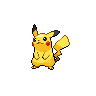

In [200]:
print(get_img(pika).format)
get_img(pika)

**Aufgabe 4:**

Mit den bisher implementierten Methoden können wir nun unseren **Pokedex** erstellen. Dieser könnte zwar als Klasse implementiert werden, wir speichern die Daten und Bilder jedoch der Einfachheit halber separat in einem Pandas Dataframe und einem Numpy Array.

1. Implementiert eine Funktion `catch_them_all(n=151)`, welche für $n$ Pokemon die reduzierten Feature Dictionaries und Bilder sammelt. Wir verwenden $n=151$ als Default da das alle Pokemon aus der ersten Edition sind.
2. Verwendet die Methoden `call_api`, `parse_poke_dict` und `get_img` in einer Schleife um alle Pokemon abzufragen.
3. Die Dictionaries sollen zunächst in einer Python Liste gesammelt, und dann als Pandas Dataframe ausgegeben werden. Als Index soll dabei `name` verwendet werden. Was fällt bei der Betrachtung der kategorialen Einträge auf? Behebt das Problem in dem Ihr einen passenden Wert für fehlende Einträge setzt.
3. Die Bilder sammeln wir separat in einem Numpy Array. Da Numpy etwas picky sein kann wenn Objekte wie PNG Bilder abgespeichert werden sollen, erstellen wir die Listen nicht wie üblich mit `np.array([])` sondern mit `np.empty(shape=(n,), dtype=object)`. Um Objekte hinzuzufügen wird dann nicht wie üblich `np.append` verwendet sondern eine Zuweisung mit Index, also `a[i] = item`.
4. Der Grund warum wir hier ein Numpy array verwenden ist, dass wir später potentielle Cluster sehr einfach über eine Indize-Liste abfragen können, sowohl im Dataframe als auch im Array. Beispiel:

In [201]:
import numpy as np
import pandas as pd

demo_data = pd.DataFrame(['Poke-1', 'Poke-2', 'Poke-3'])
demo_imgs = np.array(    ['IMG-1' , 'IMG-2' , 'IMG-3' ])

cluster_indices = [2,0]

display(demo_data.iloc[cluster_indices])
display(demo_imgs[cluster_indices])

0
2  Poke-3
0  Poke-1

array(['IMG-3', 'IMG-1'], dtype='<U5')

In [202]:

dictionaries = []
images = np.empty(shape=(0,), dtype=object)
def catch_them_all(n=151):
    url = 'https://pokeapi.co/api/v2/pokemon/'
    dictionaries = []
    images = np.empty(shape=(n,), dtype=object)
    for i in range(n):
        poke_dict = call_api(url, i+1)
        parsed_dict = parse_poke_dict(poke_dict)
        dictionaries.append(parsed_dict)
        image = get_img(poke_dict)
        images[i] = image
        
    df = pd.DataFrame(dictionaries)
    df = df.set_index('name')
    df = df.fillna(0)
    display(df)
    display(images)
    return df, images

In [203]:
catch_them_all(5)

height  weight  hp  attack  defense  special-attack  \
name                                                              
bulbasaur        7      69  45      49       49              65   
ivysaur         10     130  60      62       63              80   
venusaur        20    1000  80      82       83             100   
charmander       6      85  39      52       43              60   
charmeleon      11     190  58      64       58              80   

            special-defense  speed  grass  poison  fire  
name                                                     
bulbasaur                65     45    1.0     1.0   0.0  
ivysaur                  80     60    1.0     1.0   0.0  
venusaur                100     80    1.0     1.0   0.0  
charmander               50     65    0.0     0.0   1.0  
charmeleon               65     80    0.0     0.0   1.0

array([<PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86BE78AC0>,
       <PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86BED83A0>,
       <PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86BE78EE0>,
       <PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86BE78CA0>,
       <PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86BC59C70>],
      dtype=object)

(            height  weight  hp  attack  defense  special-attack  \
 name                                                              
 bulbasaur        7      69  45      49       49              65   
 ivysaur         10     130  60      62       63              80   
 venusaur        20    1000  80      82       83             100   
 charmander       6      85  39      52       43              60   
 charmeleon      11     190  58      64       58              80   
 
             special-defense  speed  grass  poison  fire  
 name                                                     
 bulbasaur                65     45    1.0     1.0   0.0  
 ivysaur                  80     60    1.0     1.0   0.0  
 venusaur                100     80    1.0     1.0   0.0  
 charmander               50     65    0.0     0.0   1.0  
 charmeleon               65     80    0.0     0.0   1.0  ,
 array([<PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86BE78AC0>,
        <PIL.PngImagePlu

4. Um eine Fortschrittsanzeige während des Downloads zu erhalten, installiert zunächst das Paket `tqdm`, importiert es dann wie folgt: `from tqdm.notebook import tqdm` und verwendet es in eurer Schleife, z.B. mit: `for i in tqdm(range(0, n)):`. Evtl. müssen noch die `ipywidgets` installiert werden.
5. Welche **Errors and Exceptions** können bei der Verwendung der [requests](https://requests.readthedocs.io/en/latest/user/quickstart/#errors-and-exceptions) Bibliothek auftreten? Listet diese in einer separaten Markdownzelle auf mit einer kurzen Erklärung der Fehler.

In [204]:
from tqdm.notebook import tqdm

def catch_them_all(n=151):
    url = 'https://pokeapi.co/api/v2/pokemon/'
    dictionaries = []
    images = np.empty(shape=(n,), dtype=object)
    for i in tqdm(range(n)):
        poke_dict = call_api(url, i+1)
        parsed_dict = parse_poke_dict(poke_dict)
        dictionaries.append(parsed_dict)
        image = get_img(poke_dict)
        images[i] = image
    df = pd.DataFrame(dictionaries)
    df = df.set_index('name')
    df = df.fillna(0)
    return df, images


In [205]:
catch_them_all(5)

  0%|          | 0/5 [00:00<?, ?it/s]

(            height  weight  hp  attack  defense  special-attack  \
 name                                                              
 bulbasaur        7      69  45      49       49              65   
 ivysaur         10     130  60      62       63              80   
 venusaur        20    1000  80      82       83             100   
 charmander       6      85  39      52       43              60   
 charmeleon      11     190  58      64       58              80   
 
             special-defense  speed  grass  poison  fire  
 name                                                     
 bulbasaur                65     45    1.0     1.0   0.0  
 ivysaur                  80     60    1.0     1.0   0.0  
 venusaur                100     80    1.0     1.0   0.0  
 charmander               50     65    0.0     0.0   1.0  
 charmeleon               65     80    0.0     0.0   1.0  ,
 array([<PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86CA27C10>,
        <PIL.PngImagePlu

**ConnectionError:** Wenn es ein Netzwerkproblem gibt (zB DNS failure, refused connection etc) wirft requests einen ConnectionError  <br>
**HTTPError:** Response.raise_for_status() wirft einen HTTPError wenn die HTTP request einen Fehlercode zurück gibt. <br>
**Timeout Exception:** Wenn ein Reqeust zu lange braucht um zu beantwortet zu werden <br>
**TooManyRedirects Exception:** Wenn ein Request die konfigurierte maximale Anzahl an Redirects (Umleitungen) überschreitet  


6. Wie kann sichergestellt werden, dass die Schleife bei einem Fehler nicht abbricht? Implementiert eine geeignete Lösung damit die Schleife auch mit requests-Exceptions weiterläuft. Informiert die Benutzer*innen der Methode bei welcher ID ein Fehler aufgetreten ist und gebt zusätzlich die Exception bzw. die Info, die der Error liefert. Tipp zum Testen: In Python können Exceptions manuell getriggert werden, z.B. mit `raise KeyError('Hallo, das ist ein KeyError')`, spezifische Exceptions einer Bibliothek müssen davor allerdings importiert werden. Deaktiviert alle manuell ausgelösten Test-Exceptions wieder soblad ihr euch sicher seid, dass diese robust abgefangen werden.
7. Testet euren *Pokedex* in dem ihr die Indizelisten `[0,1,2]` und `[24,150]` ausgeben lasst und stellt sicher, dass die Zuordnung zwischen Dataframe und Bild Array passt. Die `display`-Methode eignet sich hier wieder für die Ausgabe.

In [206]:
from tqdm.notebook import tqdm

import requests.exceptions

def catch_them_all(n=151):
    url = 'https://pokeapi.co/api/v2/pokemon/'
    dictionaries = []
    images = np.empty(shape=(n,), dtype=object)
    showTestExceptions = False
    for i in tqdm(range(n)):
        try:
            if (showTestExceptions):
                if (i==1):
                    raise requests.exceptions.TooManyRedirects("TooManyRedirects Error")
                elif (i==2):
                    raise requests.exceptions.ConnectionError("ConnectionError Error")
                elif (i==3):
                    raise requests.exceptions.ConnectTimeout("ConnectTimeout Error")
                elif (i==4):
                    raise requests.exceptions.HTTPError("HTTPError Error")
                elif (i==5):
                    raise requests.exceptions.RequestException("RequestException Error")
                    
            poke_dict = call_api(url, i+1)
            parsed_dict = parse_poke_dict(poke_dict)
            dictionaries.append(parsed_dict)
            image = get_img(poke_dict)
            images[i] = image
            
        except requests.exceptions.TooManyRedirects as e:
            print(f"TooManyRedirects thrown for Pokemon iD={i}:\n{e}\n") # letztes \n raus machen?
        except requests.exceptions.ConnectTimeout as e: # ich glaube ConnectTimeout erbt von ConnectionError weil wird auch von ConnectionError abgefangen
            print(f"ConnectTimeout thrown for Pokemon iD={i}:\n{e}\n")
        except requests.exceptions.ConnectionError as e:
            print(f"ConnectionError thrown for Pokemon iD={i}:\n{e}\n")
        except requests.exceptions.HTTPError as e:
            print(f"HTTPError thrown for Pokemon iD={i}:\n{e}\n")
        except requests.exceptions.RequestException as e:
            print(f"RequestException thrown for Pokemon iD={i}:\n{e}\n")

    df = pd.DataFrame(dictionaries)
    if len(dictionaries) > 0:
        df = df.set_index('name')
    df = df.fillna(0)
    return df, images
        
dic, im = catch_them_all(5)
print("----")
display(dic)
print("----")
display(im)


  0%|          | 0/5 [00:00<?, ?it/s]

----


height  weight  hp  attack  defense  special-attack  \
name                                                              
bulbasaur        7      69  45      49       49              65   
ivysaur         10     130  60      62       63              80   
venusaur        20    1000  80      82       83             100   
charmander       6      85  39      52       43              60   
charmeleon      11     190  58      64       58              80   

            special-defense  speed  grass  poison  fire  
name                                                     
bulbasaur                65     45    1.0     1.0   0.0  
ivysaur                  80     60    1.0     1.0   0.0  
venusaur                100     80    1.0     1.0   0.0  
charmander               50     65    0.0     0.0   1.0  
charmeleon               65     80    0.0     0.0   1.0

----


array([<PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86CA11F40>,
       <PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86CA118B0>,
       <PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86CA11D00>,
       <PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86CA11AC0>,
       <PIL.PngImagePlugin.PngImageFile image mode=P size=96x96 at 0x1F86CA11CD0>],
      dtype=object)

In [207]:
pokedex_dictsDF, pokedex_imgs = catch_them_all()

  0%|          | 0/151 [00:00<?, ?it/s]

___
7:

At Index 0:


height              7.0
weight             69.0
hp                 45.0
attack             49.0
defense            49.0
special-attack     65.0
special-defense    65.0
speed              45.0
grass               1.0
poison              1.0
fire                0.0
flying              0.0
water               0.0
bug                 0.0
normal              0.0
electric            0.0
ground              0.0
fairy               0.0
fighting            0.0
psychic             0.0
rock                0.0
steel               0.0
ice                 0.0
ghost               0.0
dragon              0.0
Name: bulbasaur, dtype: float64

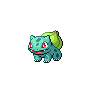

At Index 1:


height              10.0
weight             130.0
hp                  60.0
attack              62.0
defense             63.0
special-attack      80.0
special-defense     80.0
speed               60.0
grass                1.0
poison               1.0
fire                 0.0
flying               0.0
water                0.0
bug                  0.0
normal               0.0
electric             0.0
ground               0.0
fairy                0.0
fighting             0.0
psychic              0.0
rock                 0.0
steel                0.0
ice                  0.0
ghost                0.0
dragon               0.0
Name: ivysaur, dtype: float64

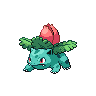

At Index 2:


height               20.0
weight             1000.0
hp                   80.0
attack               82.0
defense              83.0
special-attack      100.0
special-defense     100.0
speed                80.0
grass                 1.0
poison                1.0
fire                  0.0
flying                0.0
water                 0.0
bug                   0.0
normal                0.0
electric              0.0
ground                0.0
fairy                 0.0
fighting              0.0
psychic               0.0
rock                  0.0
steel                 0.0
ice                   0.0
ghost                 0.0
dragon                0.0
Name: venusaur, dtype: float64

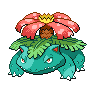

At Index 24:


height              4.0
weight             60.0
hp                 35.0
attack             55.0
defense            40.0
special-attack     50.0
special-defense    50.0
speed              90.0
grass               0.0
poison              0.0
fire                0.0
flying              0.0
water               0.0
bug                 0.0
normal              0.0
electric            1.0
ground              0.0
fairy               0.0
fighting            0.0
psychic             0.0
rock                0.0
steel               0.0
ice                 0.0
ghost               0.0
dragon              0.0
Name: pikachu, dtype: float64

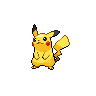

At Index 150:


height               4.0
weight              40.0
hp                 100.0
attack             100.0
defense            100.0
special-attack     100.0
special-defense    100.0
speed              100.0
grass                0.0
poison               0.0
fire                 0.0
flying               0.0
water                0.0
bug                  0.0
normal               0.0
electric             0.0
ground               0.0
fairy                0.0
fighting             0.0
psychic              1.0
rock                 0.0
steel                0.0
ice                  0.0
ghost                0.0
dragon               0.0
Name: mew, dtype: float64

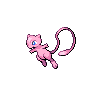

In [208]:
indizes1 = [0,1,2]
for i in indizes1:
    print(f"At Index {i}:")
    display(pokedex_dictsDF.iloc[i])
    display(pokedex_imgs[i])

indizes2 = [24,150]
for i in indizes2:
    print(f"At Index {i}:")
    display(pokedex_dictsDF.iloc[i])
    display(pokedex_imgs[i])

Nachdem wir nun unser Dataset gesammelt haben sollten wir als Teil des Preprocessing noch sicherstellen, dass folgende Eigenschaften erfüllt sind: 

1. Keine Null- oder NaN-Werte im DataFrame.
2. Binäres Encoding der kategorischen Werte.
3. Skalieren der Werte mit einem MinMaxScaler.

Zwei davon haben wir schon als Teil der Feature Extraction erledigt. Um die Skalierung kümmern wir uns jetzt.

**Aufgabe 5:**

1. Instanziiert ein `from sklearn.preprocessing import MinMaxScaler` Objekt und wendet diesen auf den Dataframe an.
2. Die transformierten Daten sollen wieder in ein Pandas Dataframe umgewandelt werden. Die Columns sowie der Index sind dabei die Selben wie im unskalierten Dataframe.
3. Gebt die originalen und skalierten Daten aus, um die Dataframes zu vergleichen.
4. Importiert abschliesend die Bibliothek `seaborn` mit `import seaborn as sns` und analysiert die **skalierten numerischen Daten** mit einem [`sns.pairplot` (link)](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Wählt dazu nur die numerischen Columns des Dataframes aus.
5. Beschreibt kurz Auffälligkeiten in den Verteilungen (falls vorhanden). 

In [209]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [210]:
scaled_data = scaler.fit_transform(pokedex_dictsDF)
scaled_df = pd.DataFrame(scaled_data, columns=pokedex_dictsDF.columns, index=pokedex_dictsDF.index)
print("Unscaled:")
display(pokedex_dictsDF)
print("Scaled:")
display(scaled_df)

Unscaled:


height  weight   hp  attack  defense  special-attack  \
name                                                               
bulbasaur        7      69   45      49       49              65   
ivysaur         10     130   60      62       63              80   
venusaur        20    1000   80      82       83             100   
charmander       6      85   39      52       43              60   
charmeleon      11     190   58      64       58              80   
...            ...     ...  ...     ...      ...             ...   
dratini         18      33   41      64       45              50   
dragonair       40     165   61      84       65              70   
dragonite       22    2100   91     134       95             100   
mewtwo          20    1220  106     110       90             154   
mew              4      40  100     100      100             100   

            special-defense  speed  grass  poison  ...  electric  ground  \
name                                               ...                     
bulbasaur                65     45    1.0     1.0  ...       0.0     0.0   
ivysaur                  80     60    1.0     1.0  ...       0.0     0.0   
venusaur                100     80    1.0     1.0  ...       0.0     0.0   
charmander               50     65    0.0     0.0  ...       0.0     0.0   
charmeleon               65     80    0.0     0.0  ...       0.0     0.0   
...                     ...    ...    ...     ...  ...       ...     ...   
dratini                  50     50    0.0     0.0  ...       0.0     0.0   
dragonair                70     70    0.0     0.0  ...       0.0     0.0   
dragonite               100     80    0.0     0.0  ...       0.0     0.0   
mewtwo                   90    130    0.0     0.0  ...       0.0     0.0   
mew                     100    100    0.0     0.0  ...       0.0     0.0   

            fairy  fighting  psychic  rock  steel  ice  ghost  dragon  
name                                                                   
bulbasaur     0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
ivysaur       0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
venusaur      0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
charmander    0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
charmeleon    0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
...           ...       ...      ...   ...    ...  ...    ...     ...  
dratini       0.0       0.0      0.0   0.0    0.0  0.0    0.0     1.0  
dragonair     0.0       0.0      0.0   0.0    0.0  0.0    0.0     1.0  
dragonite     0.0       0.0      0.0   0.0    0.0  0.0    0.0     1.0  
mewtwo        0.0       0.0      1.0   0.0    0.0  0.0    0.0     0.0  
mew           0.0       0.0      1.0   0.0    0.0  0.0    0.0     0.0  

[151 rows x 25 columns]

Scaled:


height    weight        hp    attack   defense  special-attack  \
name                                                                           
bulbasaur   0.058140  0.014786  0.145833  0.341085  0.251429        0.359712   
ivysaur     0.093023  0.028050  0.208333  0.441860  0.331429        0.467626   
venusaur    0.209302  0.217221  0.291667  0.596899  0.445714        0.611511   
charmander  0.046512  0.018265  0.120833  0.364341  0.217143        0.323741   
charmeleon  0.104651  0.041096  0.200000  0.457364  0.302857        0.467626   
...              ...       ...       ...       ...       ...             ...   
dratini     0.186047  0.006958  0.129167  0.457364  0.228571        0.251799   
dragonair   0.441860  0.035660  0.212500  0.612403  0.342857        0.395683   
dragonite   0.232558  0.456404  0.337500  1.000000  0.514286        0.611511   
mewtwo      0.209302  0.265058  0.400000  0.813953  0.485714        1.000000   
mew         0.023256  0.008480  0.375000  0.736434  0.542857        0.611511   

            special-defense     speed  grass  poison  ...  electric  ground  \
name                                                  ...                     
bulbasaur          0.428571  0.222222    1.0     1.0  ...       0.0     0.0   
ivysaur            0.571429  0.333333    1.0     1.0  ...       0.0     0.0   
venusaur           0.761905  0.481481    1.0     1.0  ...       0.0     0.0   
charmander         0.285714  0.370370    0.0     0.0  ...       0.0     0.0   
charmeleon         0.428571  0.481481    0.0     0.0  ...       0.0     0.0   
...                     ...       ...    ...     ...  ...       ...     ...   
dratini            0.285714  0.259259    0.0     0.0  ...       0.0     0.0   
dragonair          0.476190  0.407407    0.0     0.0  ...       0.0     0.0   
dragonite          0.761905  0.481481    0.0     0.0  ...       0.0     0.0   
mewtwo             0.666667  0.851852    0.0     0.0  ...       0.0     0.0   
mew                0.761905  0.629630    0.0     0.0  ...       0.0     0.0   

            fairy  fighting  psychic  rock  steel  ice  ghost  dragon  
name                                                                   
bulbasaur     0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
ivysaur       0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
venusaur      0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
charmander    0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
charmeleon    0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
...           ...       ...      ...   ...    ...  ...    ...     ...  
dratini       0.0       0.0      0.0   0.0    0.0  0.0    0.0     1.0  
dragonair     0.0       0.0      0.0   0.0    0.0  0.0    0.0     1.0  
dragonite     0.0       0.0      0.0   0.0    0.0  0.0    0.0     1.0  
mewtwo        0.0       0.0      1.0   0.0    0.0  0.0    0.0     0.0  
mew           0.0       0.0      1.0   0.0    0.0  0.0    0.0     0.0  

[151 rows x 25 columns]

___
4:

In [211]:
import seaborn as sns
import warnings

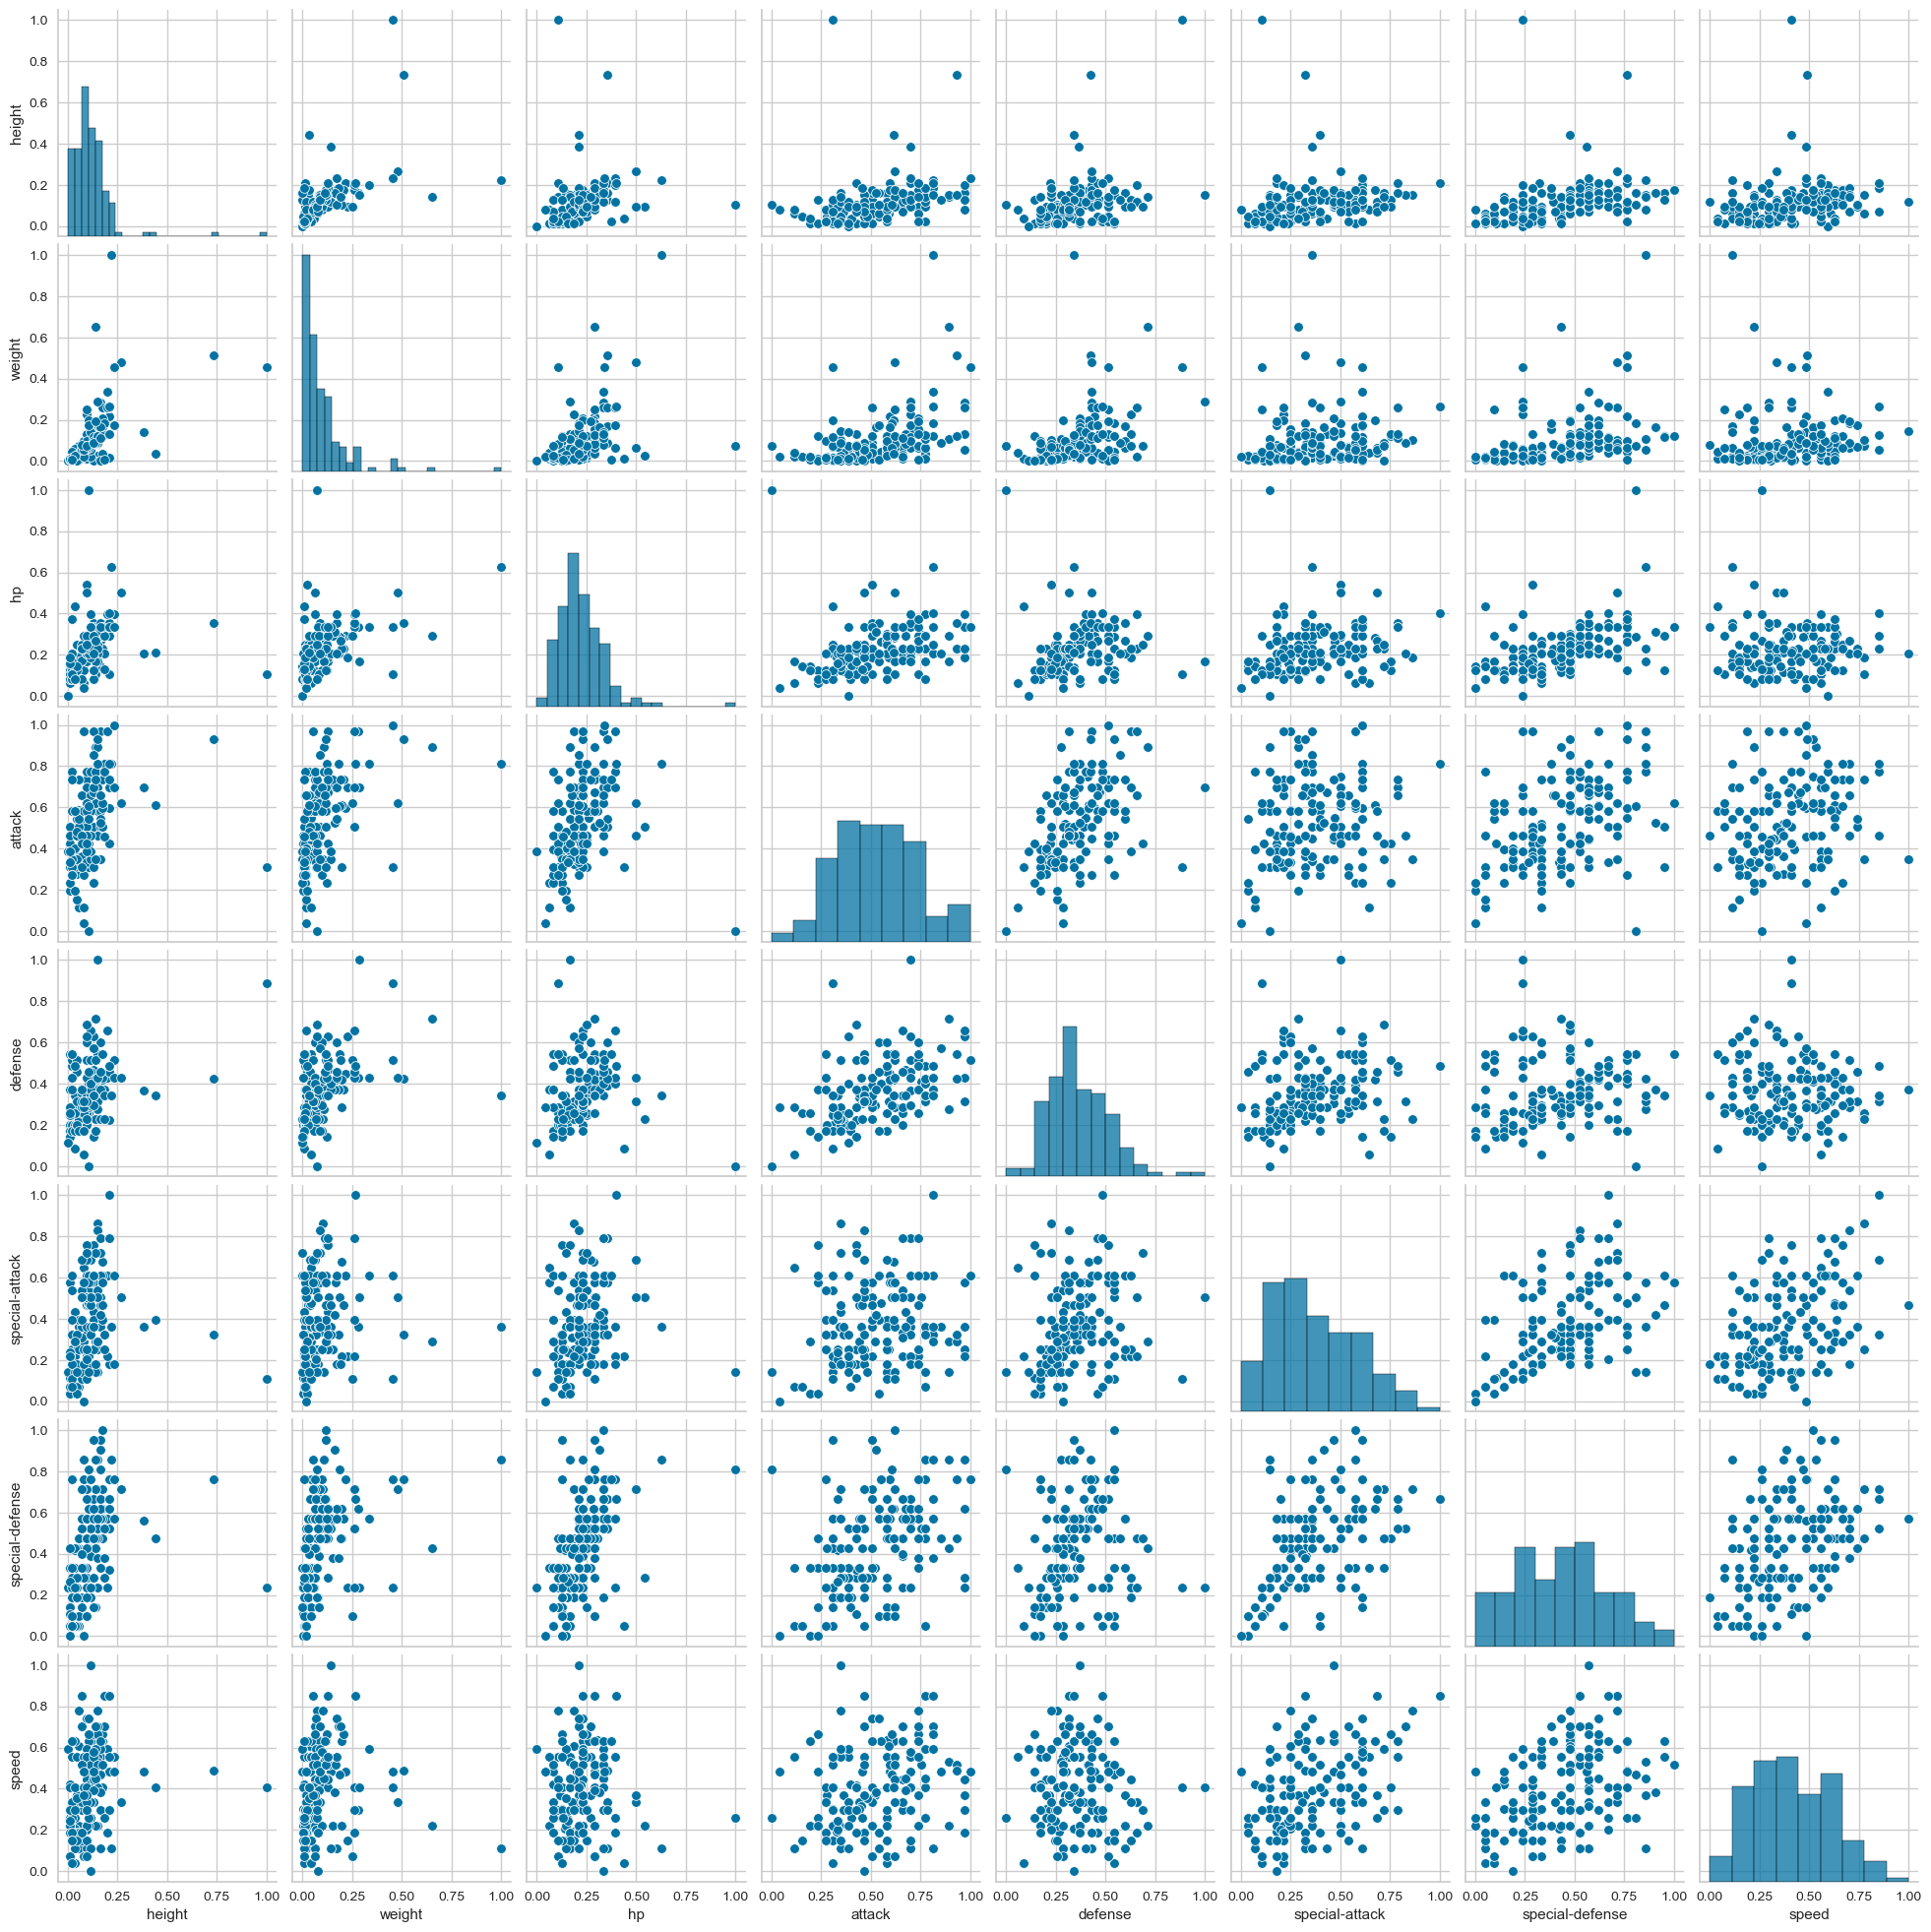

In [212]:
scaled_df_numeric = scaled_df.iloc[:, :8].copy()
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #keine Lösung für "tight_layout" Warnung gefunden Fehler gefunden
    sns.pairplot(scaled_df_numeric)


Die Special-Stats scheinen etwas Proportional zueinander zu sein.
Ebenso lassen die meisten Stats eine leichte porportionalität zu HP erahnen.
Höhe, Gewicht und HP sind eher linkslastig, wobei die anderen Stats eher einer Normal-Verteilung ähneln.


## 2. Data Visualization & Dimensionsreduktion

Konntet ihr bereits Cluster in den Daten ausfindig machen? Nein? Keine Sorge, wir auch nicht. 

In diesem Abschnitt verwenden wir daher die Principal Component Analysis (PCA) Methode um unsere hochdimensionalen Daten in einem 2D-Raum abzubilden. Diese Methode wird in einer späteren Übung noch genauer erklärt und benutzt. Hier soll sie einfach als Blackbox verwendet werden. Man sollte nur wissen, dass damit ein hochdimensionaler Raum auf wenige Dimensionen reduziert werden kann ohne dabei viel Information zu verlieren. Auch das Clustering werden wir in diesem reduzierten Raum durchführen. Bevor wir uns aber um die PCA kümmern implementieren wir noch ein paar hilfreiche Visualisierungsfunktionen mit denen wir später die gefundenen Cluster besser analysieren können.

**Aufgabe 6:**

1. Implementiert eine Funktion `plot_images(img_list)` die als Input ein Numpy Array mit Pillow Image Objekten akzeptiert und diese in einem fixen Grid visualisiert. Verwendet dazu die Bibliothek `matplotlib` mit `import matplotlib.pyplot as plt`.
2. Erstellt zunächst **eine** neue Figure mit einer geeigneten quadratischen figsize. Pillow Images können mit der Funktion `imshow` geplottet werden. Um die Plots in einm Grid anzuordnen kann die Funktion `add_subplot(nrows, ncols, index)` verwendet werden (index muss bei 1 starten), bei 151 Pokemon ist ein 13x13 Grid eine gute Wahl. Für jeden Subplot können die Achsen mit `plt.axis('off')` deaktiviert werden.
3. Um eine Liste zu iterieren und dabei auch den aktuellen Index zu erhalten kann die Funktion `enumerate(['a','b','c'])` verwendet werden (Achtung: Index startet bei 0).
4. **Nachdem** alle Subplots erstellt wurden, muss **einmal** `plt.show()` aufgerufen werden.
5. Testet die Funktion mit dem Indize Subset `[0,1,2,24]` und einmal mit allen Pokemon.

In [213]:
import matplotlib.pyplot as plt

In [214]:
def plot_images(img_list):
    fig = plt.figure(figsize=(20,20))
    
    for i in range(1, len(img_list) + 1):
        img = img_list[i - 1]
        sub = fig.add_subplot(13,13, i)
        sub.imshow(img)
        sub.axis('off')
        
    plt.show()
        

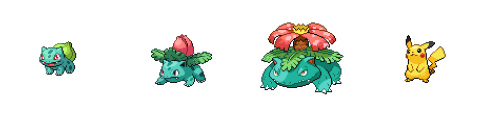

In [215]:
img_subset = [pokedex_imgs[i] for i in [0, 1, 2, 24]]
plot_images(img_subset)

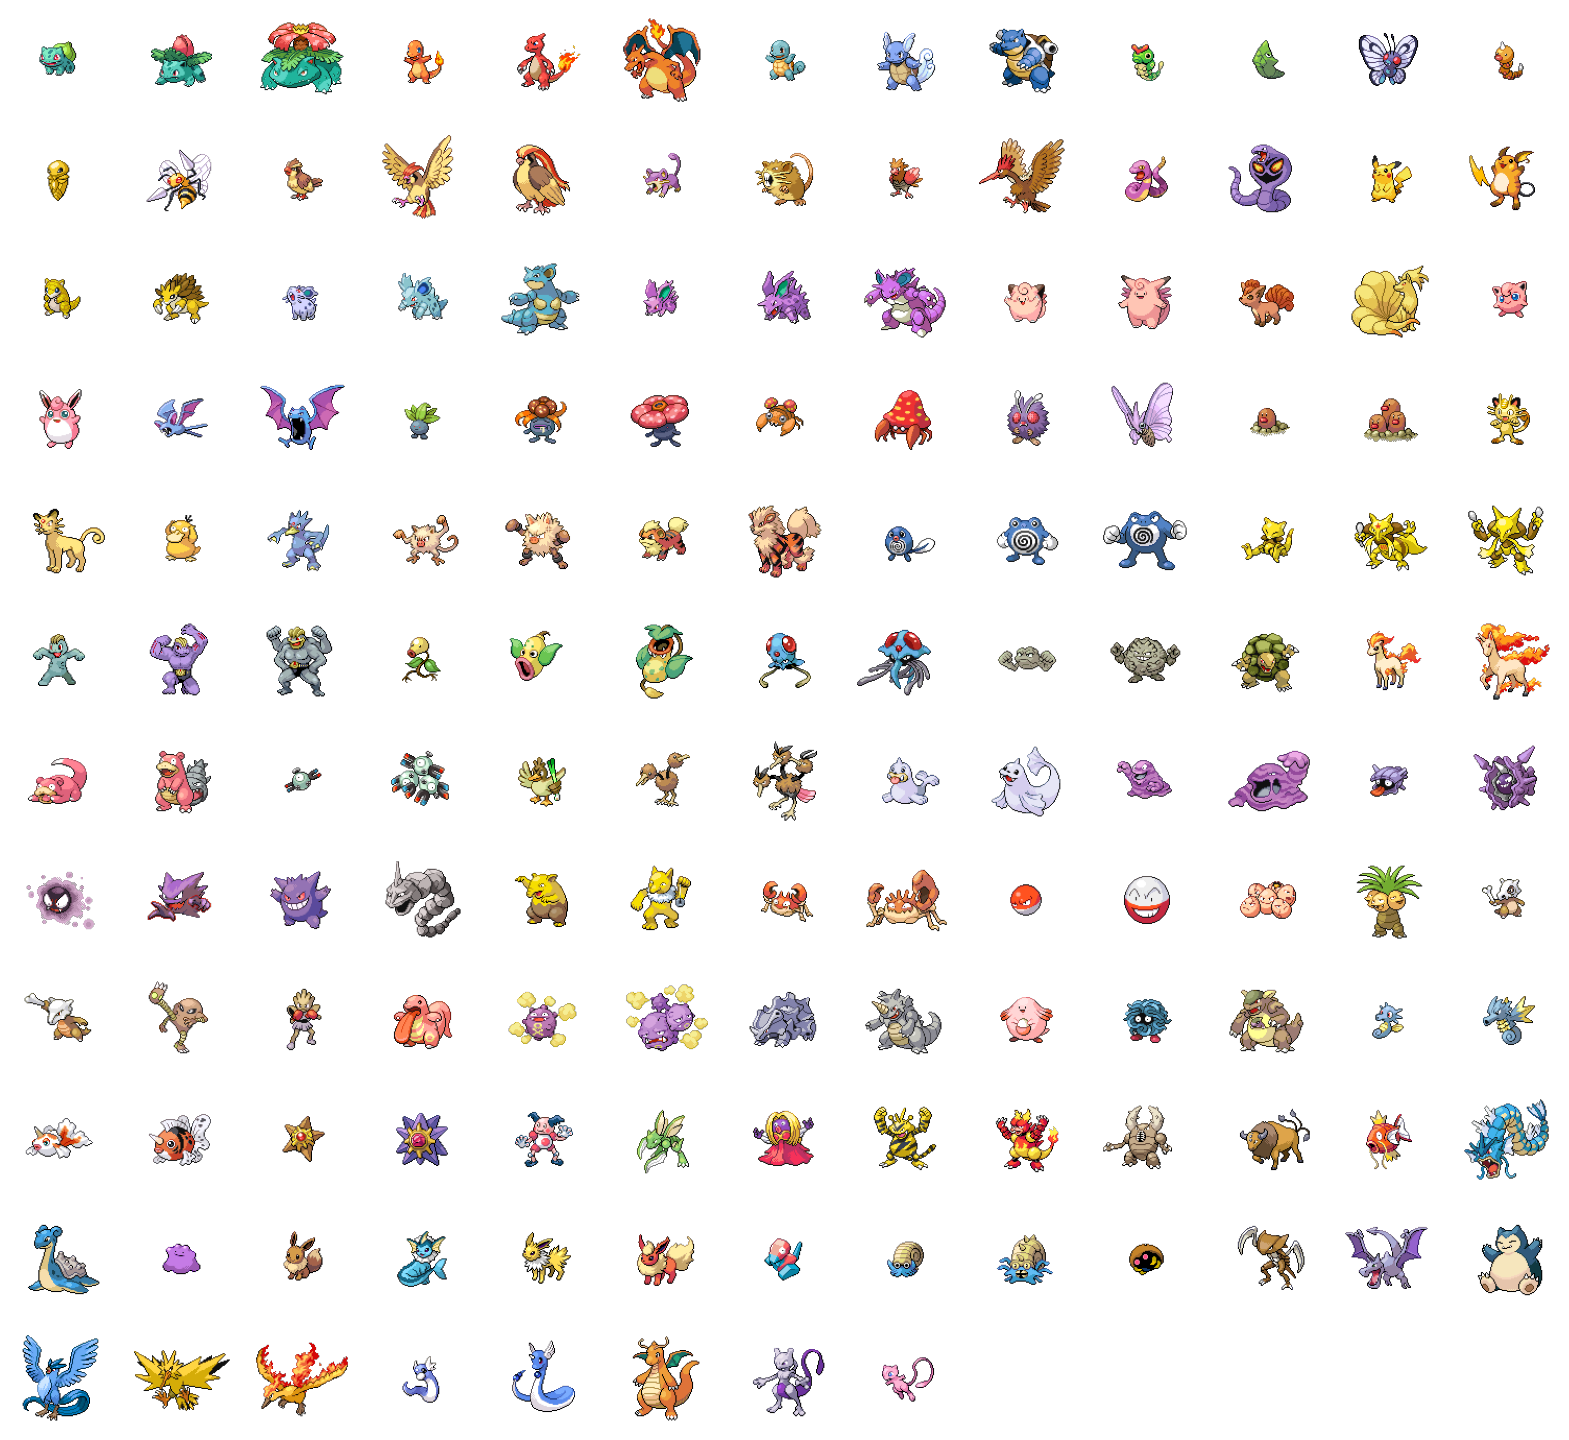

In [216]:
plot_images(pokedex_imgs)

**Aufgabe 7:**
    
1. Implementiert zwei Funktionen `plot_numerics(dataframe)` und `plot_categories(dataframe)` die als Input ein komplettes Dataframe akzeptieren aber jeweils nur die numerischen oder kategorischen Spalten visualisieren. Verwendet dazu wieder die Bibliothek `seaborn`.
2. Die Methoden sollen selbständig nur die numerischen oder kategorischen Spalten des Dataframes auswählen.
3. Für numerische Werte könnt ihr entweder ein [`sns.barplot` (link)](https://seaborn.pydata.org/generated/seaborn.barplot.html) oder [`sns.boxplot` (link)](https://seaborn.pydata.org/generated/seaborn.boxplot.html) verwenden. Damit wir später verschiedene Cluster miteinander vergleichen können ist eine konstante Y-Range sinnvoll, z.B. `plt.ylim(0,1.1)`.
4. Für kategorische Werte verwendet ihr ein `sns.barplot`. Per Default wendet seaborn hier den `estimator='mean'` auf die Daten an. Ist das für die kategorischen Columns eine geeignete Statistik? Mit welcher einfachen arithmetischen Funktion könnt ihr die Anzahl der binär codierten Kategorien zählen? Verwendet diese als estimator und wählt eine passende konstante Y-Range. Falls Fehlerbalken keine Sinn machen, können diese mit `errorbar=None` deaktiviert werden.
5. Die Labels der X-Achse können mit `plt.xticks(rotation=90)` rotiert werden.
6. Ruft in den Funktionen **noch nicht** `plt.show()` auf damit wir diese in einer Grid Darstellung verwenden können.
7. Testet eure Funktionen mit dem skalierten Dataframe.

In [217]:
def plot_numerics(dataframe):
    num_feat = dataframe.iloc[:, :8].copy()
    sns.boxplot(num_feat)
    plt.ylim(0,1.1)
    plt.xticks(rotation=90)
    
def plot_categories(dataframe):
    cat_feat = dataframe.iloc[:, 8:25].copy()
    sns.barplot(cat_feat, errorbar=None, estimator='sum')
    plt.ylim(0,50)
    plt.xticks(rotation=90)

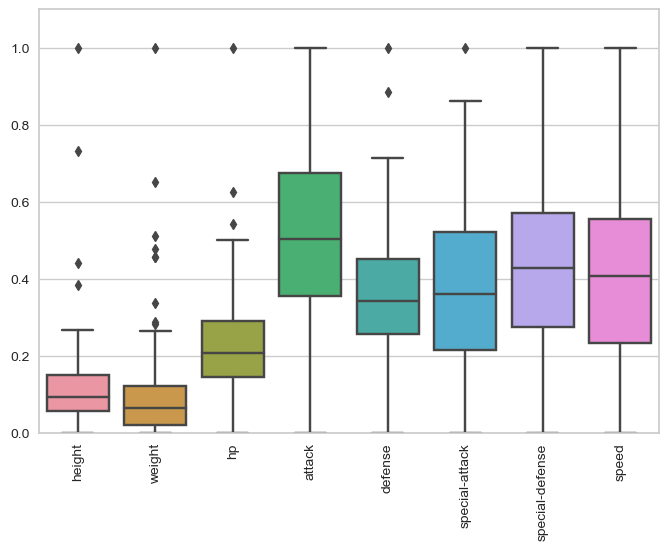

In [218]:
plot_numerics(scaled_df)

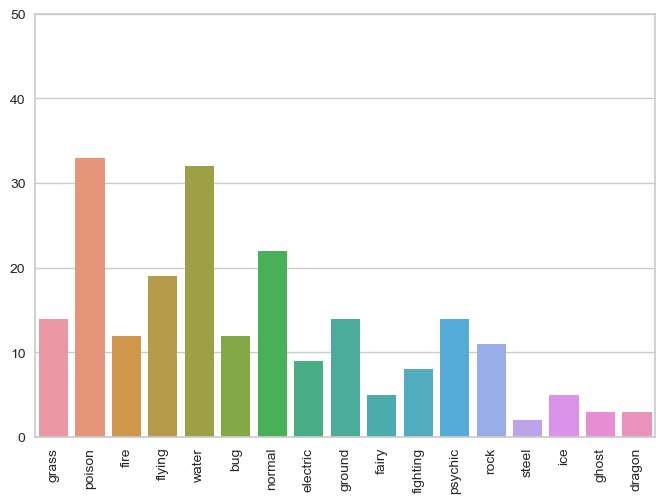

In [219]:
plot_categories(scaled_df)

Die drei bisher implementierten Funktionen möchten wir nun dazu verwenden, um gefundene Cluster zu visualiseren. Mit der untenstehenden Funktion könnt Ihr euch zum Test Fake Cluster generieren. Später implementieren wir diese Datenstruktur mit den echten Clustern. Die Keys des Dictionaries sind die Cluster Namen, die Values jeweils eine Liste mit den Indizes der Pokemon, die zu diesem Cluster gehören.

In [220]:
def get_fake_cluster(n_cluster=5, items_per_cluster=10, n_pokemon=151):

    cluster_dict = {}
    fake_cluster = np.random.choice(n_pokemon, (n_cluster, items_per_cluster), replace=False)
    for i, c in enumerate(fake_cluster):
        cluster_dict[i] = c
    return cluster_dict

test_cluster = get_fake_cluster()
test_cluster

{0: array([144,  96, 101,  24,  98,  70,  62, 122, 100,  54]),
 1: array([ 93,   6,  49,  69, 142,  60,  27, 104,  79,  40]),
 2: array([ 64, 136, 130,  41,  94,  13,  80,  19,  45,  28]),
 3: array([ 56,  20, 105, 107,  15, 116,  10,  58, 139,  99]),
 4: array([ 84,  91, 133,  65, 143, 106, 134, 129,  30,  52])}

**Aufgabe 8:**

1. Implementiert eine Funktion `compare_cluster(cluster_dict, dataframe, image_array)`, welche als Parameter ein Cluster Dictionary, die Pokemon Daten und Pokemon Bilder akzeptiert und für jedes Cluster die Daten und Bilder visualisiert. Wir vergleichen dabei zunächst die numerischen Werte der Cluster, dann die kategorischen und zum Schluss die Bilder. Geht bei der folgenden Implementierung Schritt für Schritt vor!
2. Erstellt zunächst eine Figure für die numerischen Werte mit der Größe `(20,40)`.
3. Nun iterieren wir über das `cluster_dict`. Da die Cluster Namen nicht zwingend bei 0 starten, ist es gut über den Inhalt des Dictionaries mit `for i, (c_name, c_indices) in enumerate(cluster_dict.items())` zu iterieren.
4. Erstellt für jedes Cluster ein Subplot in einem 10x5 Grid. Damit könnten bis zu 50 Cluster visualisiert werden. Dies ist erstmal ausreichend. Meistens haben wir viel weniger Cluster, die wir vergleichen möchten.
5. Gebt jedem Subplot einen Titel, der den Cluster Namen anzeigt.
6. Benutzt die Cluster Indizes nun um ein Subset des Dataframes zu selektieren und plottet das Cluster mit der `plot_numerics` Funktion.
7. Nach der Schleife ruft ihr `fig.tight_layout(h_pad=1, w_pad=1)` und `plt.show()` auf. Die Layout Funktion könnt ihr in Kombination mit der Größe der Figure verwenden, um die Darstellung schöner zu machen (sollte aber schon passen).
8. Wiederholt die Schritte 2-7, aber ruft dieses mal die Funktion `plot_categories` auf.
9. Iteriert ein letztes mal über das Cluster Dictionary, selektiert nun aber die Bilder und verwendet `plot_images`. Gebt mit einem einfachen `print`-Befehl davor an, welches Cluster gerade angezeigt wird.
10. Testet die Methode mit 1,5 und 10 Clustern. Wird alles korrekt dargestellt? Achtung, es gibt hier nichts inhaltliches zu analysieren. Das sind bisher nur Test Cluster ;) Zeigt bei der Abgabe, dass es für 10 Cluster gut funktioniert.

In [221]:
def compare_cluster(cluster_dict, dataframe=scaled_df, image_array=pokedex_imgs): 
    fig = plt.figure(figsize=(20, 40))
    for i, (c_name, c_indices) in enumerate(cluster_dict.items()):
        subplot = fig.add_subplot(10, 5, i+1, title=c_name)

        subset = dataframe.iloc[c_indices]
        plot_numerics(subset)
    fig.tight_layout(h_pad=1, w_pad=1)
    plt.show()
    fig2 = plt.figure(figsize=(20, 40))
    for i, (c_name, c_indices) in enumerate(cluster_dict.items()):
        subplot = fig2.add_subplot(10, 5, i+1, title=c_name)
        subset = dataframe.iloc[c_indices]
        plot_categories(subset)
    fig2.tight_layout(h_pad=1, w_pad=1)
    plt.show()
    for i, (c_name, c_indices) in enumerate(cluster_dict.items()):
        subset = image_array[c_indices]
        print("Cluster ", c_name, " wird angezeigt: ")
        plot_images(subset)
        

___
10:

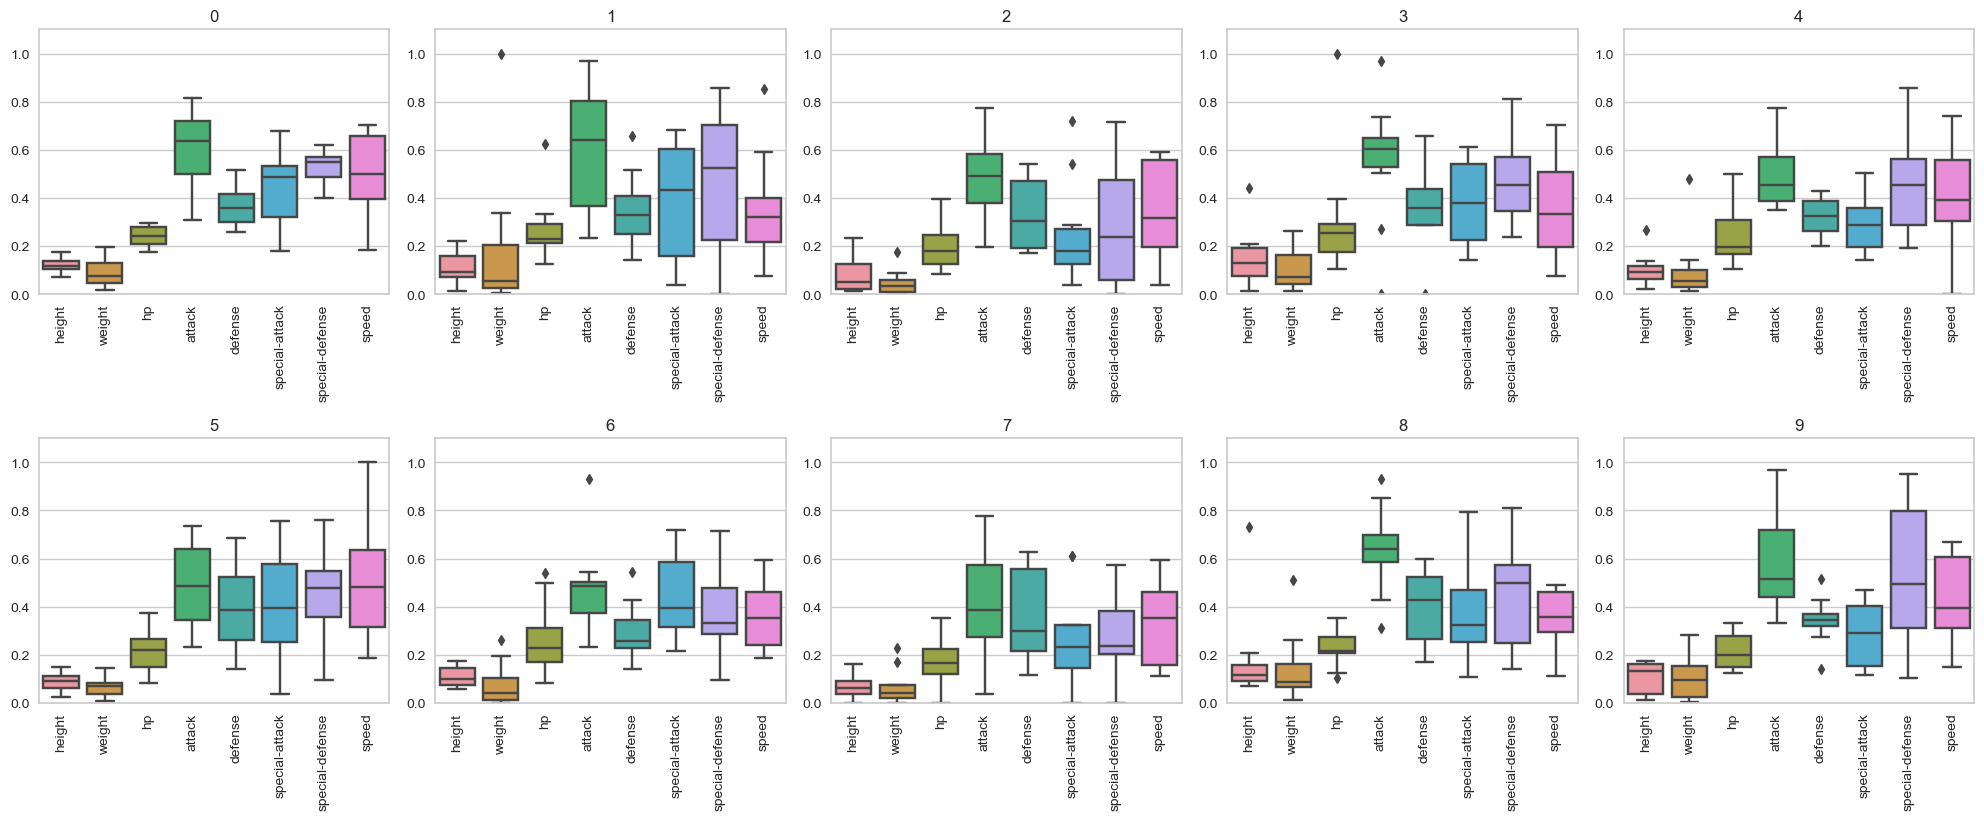

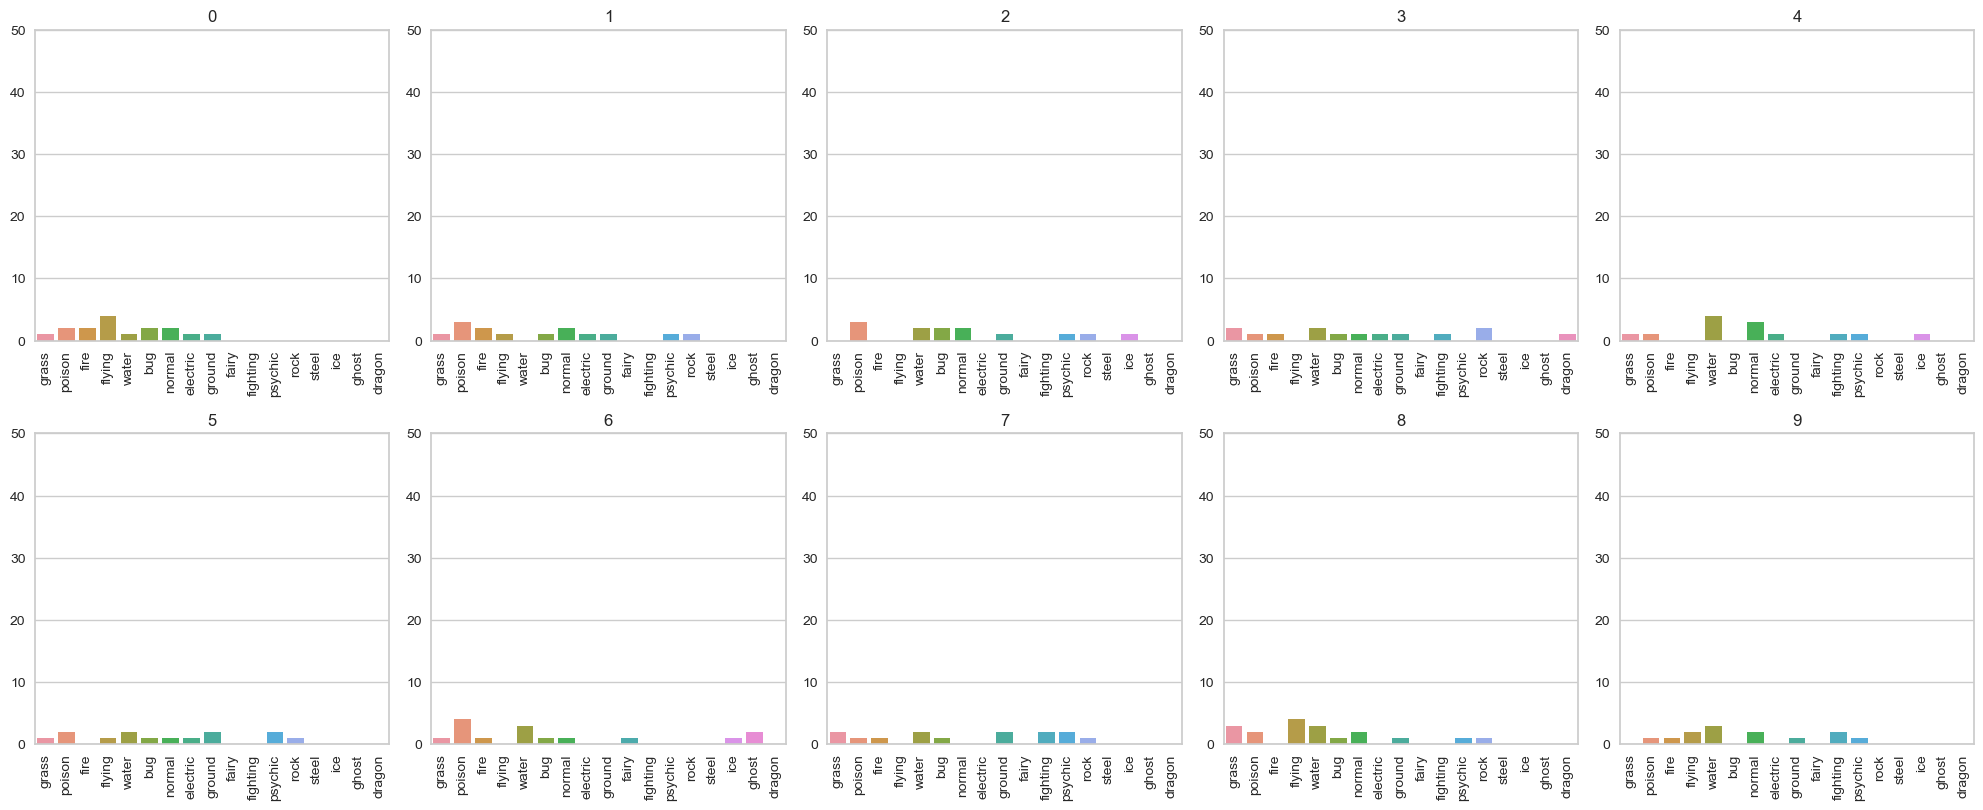

Cluster  0  wird angezeigt: 


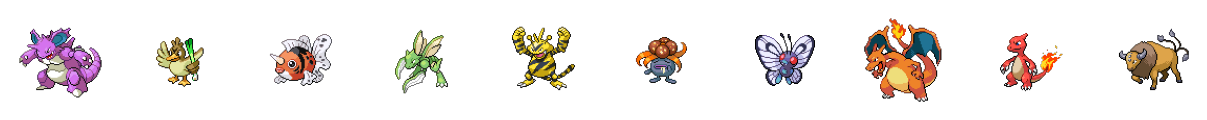

Cluster  1  wird angezeigt: 


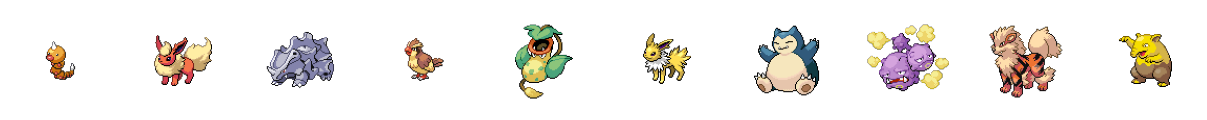

Cluster  2  wird angezeigt: 


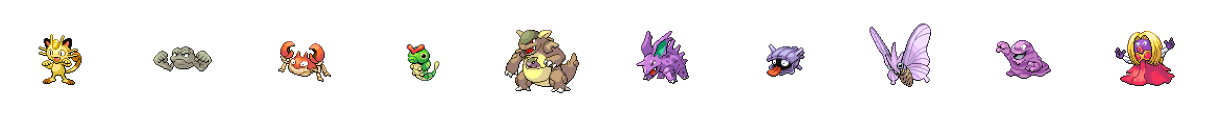

Cluster  3  wird angezeigt: 


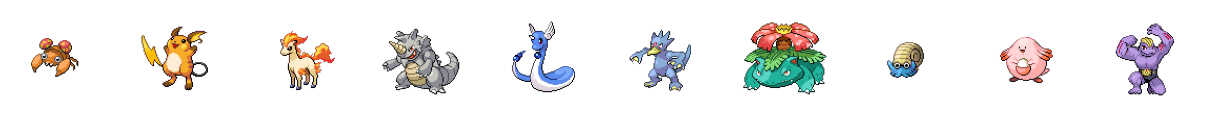

Cluster  4  wird angezeigt: 


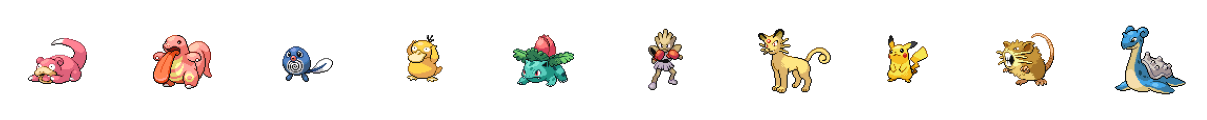

Cluster  5  wird angezeigt: 


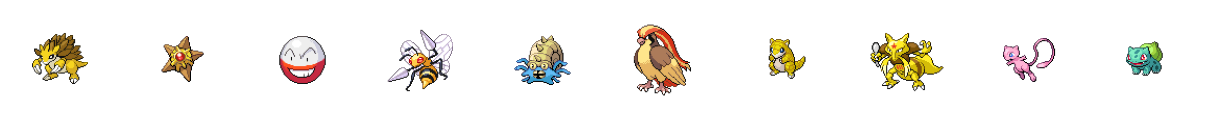

Cluster  6  wird angezeigt: 


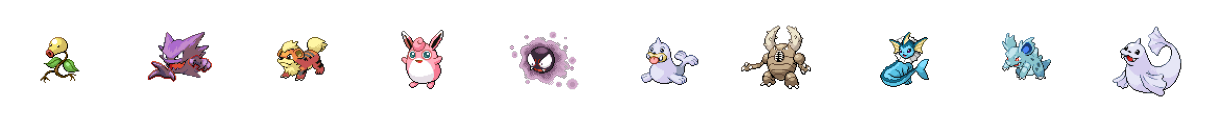

Cluster  7  wird angezeigt: 


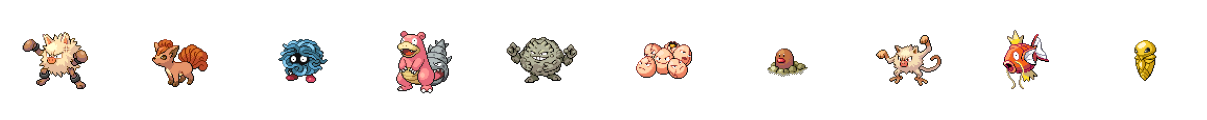

Cluster  8  wird angezeigt: 


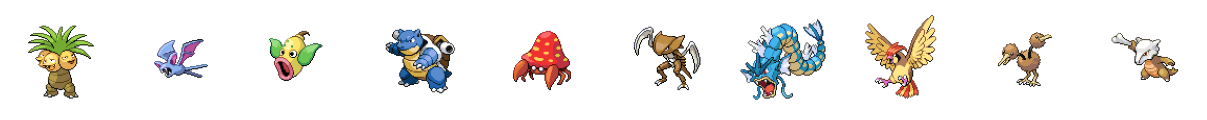

Cluster  9  wird angezeigt: 


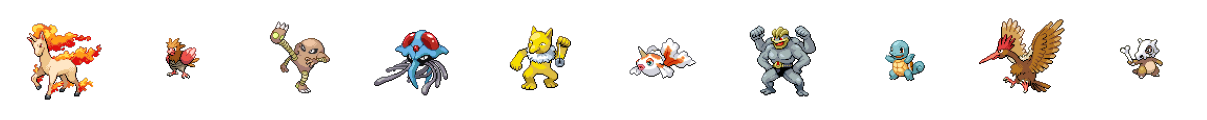

In [222]:
test1_cluster = get_fake_cluster(n_cluster=1)
test5_cluster = get_fake_cluster(n_cluster=5)
test10_cluster = get_fake_cluster(n_cluster=10)
compare_cluster(test10_cluster, scaled_df, pokedex_imgs)

Bisher können wir potentielle Cluster im hochdimensionalen Raum vergleichen, was uns erlaubt die Eigenschaften der gefundenen Cluster zu interpretieren. Für den Clustering-Algorithmus und die kompaktere Visualisierung wird empfohlen, eine Dimensionsreduktion mit der PCA-Methode durchzuführen, da dies eine gute Visualisierung der Daten in einem 2D-Raum ermöglicht.

**Aufgabe 9:**

1. Implementiert eine Funktion `apply_pca(dataframe)` welche ein skaliertes Dataframe akzeptiert und die Daten auf **zwei Dimensionen** reduziert.
2. Instanziiert ein [`from sklearn.decomposition import PCA` (link)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) Objekt. Wir möchten die Daten dabei auf zwei Komponenten reduzieren.
3. Wendet die PCA-Methode auf das Dataframe an. Die API ist dieselbe wie bei einem MinMaxScaler.
4. Die reduzierten Daten sollen wieder als Dataframe zurückgegeben werden. Der Index soll derselbe wie im ursprünglichem Dataframe sein.
5. Gebt den Dataframe vor und nach der Dimensionsreduktion aus. Mit der untenstehenden Funktion könnt ihr die auf zwei Dimensionen reduzierten Daten plotten. Der Index wird dabei als Hover Information angezeigt, sodass man erkennen kann welche Punkte wo liegen. Später können noch die Cluster Label und Cluster Center übergeben werden. Evtl. müsst ihr `plotly` installieren.

In [223]:
import plotly.express as px

def plot_pca_data(pca_dataframe, c_labels=None, c_center=None):
    '''
    This function plots a dataframe with two dimensions. If a list of cluster labels (and/or cluster centers)
    is provided, these are set as color highlights. The index of the dataframe is used as hover information for
    the labels. Note that the input dataframe is left unchanged as we work on a copy!
    '''
    df = pca_dataframe.copy()
    df['Cluster'] = c_labels
    df = df.sort_values(by='Cluster')
    df['Cluster'] = df['Cluster'].astype('str')
    fig = px.scatter(df, x=0, y=1, color='Cluster', hover_data={'Name': df.index})
    
    if c_center is not None:
        l, c = len(px.colors.qualitative.Plotly), len(c_center)
        df, colors = pd.DataFrame(c_center), (px.colors.qualitative.Plotly * ((c // l) + 1))[:c]
        fig.add_scatter(x=df[0], y=df[1], name="Cluster Center", mode='markers', marker={'symbol':
                       'cross-thin-open', 'size':10, 'color': colors, 'opacity':1})
    
    fig.show()

In [224]:
from sklearn.decomposition import PCA
def apply_pca(dataframe):
    pca = PCA(n_components=2)
    reduced_array = pca.fit_transform(dataframe)
    reduced_df = pd.DataFrame(reduced_array, index=dataframe.index)
    return reduced_df

In [225]:
print("Scaled:")
display(scaled_df)
reduced_df = apply_pca(scaled_df)
print("\nReduced:")
display(reduced_df)
print("\nPlot:")
plot_pca_data(apply_pca(scaled_df))

Scaled:


height    weight        hp    attack   defense  special-attack  \
name                                                                           
bulbasaur   0.058140  0.014786  0.145833  0.341085  0.251429        0.359712   
ivysaur     0.093023  0.028050  0.208333  0.441860  0.331429        0.467626   
venusaur    0.209302  0.217221  0.291667  0.596899  0.445714        0.611511   
charmander  0.046512  0.018265  0.120833  0.364341  0.217143        0.323741   
charmeleon  0.104651  0.041096  0.200000  0.457364  0.302857        0.467626   
...              ...       ...       ...       ...       ...             ...   
dratini     0.186047  0.006958  0.129167  0.457364  0.228571        0.251799   
dragonair   0.441860  0.035660  0.212500  0.612403  0.342857        0.395683   
dragonite   0.232558  0.456404  0.337500  1.000000  0.514286        0.611511   
mewtwo      0.209302  0.265058  0.400000  0.813953  0.485714        1.000000   
mew         0.023256  0.008480  0.375000  0.736434  0.542857        0.611511   

            special-defense     speed  grass  poison  ...  electric  ground  \
name                                                  ...                     
bulbasaur          0.428571  0.222222    1.0     1.0  ...       0.0     0.0   
ivysaur            0.571429  0.333333    1.0     1.0  ...       0.0     0.0   
venusaur           0.761905  0.481481    1.0     1.0  ...       0.0     0.0   
charmander         0.285714  0.370370    0.0     0.0  ...       0.0     0.0   
charmeleon         0.428571  0.481481    0.0     0.0  ...       0.0     0.0   
...                     ...       ...    ...     ...  ...       ...     ...   
dratini            0.285714  0.259259    0.0     0.0  ...       0.0     0.0   
dragonair          0.476190  0.407407    0.0     0.0  ...       0.0     0.0   
dragonite          0.761905  0.481481    0.0     0.0  ...       0.0     0.0   
mewtwo             0.666667  0.851852    0.0     0.0  ...       0.0     0.0   
mew                0.761905  0.629630    0.0     0.0  ...       0.0     0.0   

            fairy  fighting  psychic  rock  steel  ice  ghost  dragon  
name                                                                   
bulbasaur     0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
ivysaur       0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
venusaur      0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
charmander    0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
charmeleon    0.0       0.0      0.0   0.0    0.0  0.0    0.0     0.0  
...           ...       ...      ...   ...    ...  ...    ...     ...  
dratini       0.0       0.0      0.0   0.0    0.0  0.0    0.0     1.0  
dragonair     0.0       0.0      0.0   0.0    0.0  0.0    0.0     1.0  
dragonite     0.0       0.0      0.0   0.0    0.0  0.0    0.0     1.0  
mewtwo        0.0       0.0      1.0   0.0    0.0  0.0    0.0     0.0  
mew           0.0       0.0      1.0   0.0    0.0  0.0    0.0     0.0  

[151 rows x 25 columns]


Reduced:


0         1
name                          
bulbasaur   1.056084 -0.273566
ivysaur     1.022966 -0.270485
venusaur    0.962203 -0.265069
charmander -0.052749  0.145640
charmeleon -0.087702  0.146718
...              ...       ...
dratini    -0.019700  0.076540
dragonair  -0.072044  0.080448
dragonite  -0.246119  0.506799
mewtwo     -0.232667 -0.008870
mew        -0.195391 -0.019153

[151 rows x 2 columns]


Plot:


## 3. Clustering mit dem KMeans Algorithmus

Im letzten Teil des Versuchs wenden wir nun endlich ein Clustering Verfahren an. Wie ihr sehen werded, ist dies sehr einfach und auch der Grund, warum sich die ganze Vorarbeit auszahlt :)

**Aufgabe 10:**

1. Implementiert eine Funktion `kmeans(dataframe, n_cluster)`, die ein noch nicht reduzierten Dataframe, sowie die Anzahl der gewünschten Cluster akzeptiert. Als Rückgabewert erstellen wir ein Cluster Dictionary, das wir dann in der `compare_cluster`-Methode zur Analyse und Interpretation der Cluster verwenden können.
2. Instanziiert ein [`from sklearn.cluster import KMeans` (link)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) Objekt mit `n_cluster`.
3. Wendet die Methode `apply_pca` auf den Dataframe an und fittet den KMeans-Algorithmus auf die transformierten Daten.
4. Ruft die Methode `plot_pca_data` auf und übergebt zusätzlich die Liste der gefundenen Cluster Labels. Optional kann zusätzlich noch die Liste der Clusterzentren übergeben werden.
5. Als letzten Schritt konvertieren wir noch die Liste der Cluster Labels in ein Cluster Dictionary. Implementiert diesen Schritt zunächst in einer separaten Code Zelle und integriert diesen dann in die `kmeans`-Methode, wenn ihr euch sicher seid, dass alles funktioniert.
6. Schaut euch zunächst die Liste an Cluster Labels an, die der KMeans-Algorithmus erzeugt. Diese möchten wir in ein Dictionary mit dem selben Format wie die Fake Cluster bringen. Die Keys sollen dabei die Cluster IDs sein, die Values jeweils eine Liste mit den Indizes der Elemente, die diesem Cluster zugeordnet wurden. Mit der Methode `np.unique` könnt ihr überprüfen welche eindeutigen Cluster IDs es gibt. Iteriert dann über diese Liste an IDs und verwendet `np.where`, um zu sehen welche Elemente in der Label Liste diesem Cluster zugeordnet wurden (ihr bekommt jeweils eine Liste mit den Indizes der Elemente zurück). Baut damit ein Cluster Dictionary und gebt dieses als Rückgabewert aus.
7. Zeigt beispielhaft das Ergebnis eines Clusterings und dass `compare_cluster` korrekt mit eurem Cluster Dictionary umgehen kann.

In [226]:
from sklearn.cluster import KMeans

In [227]:
def kmeans(dataframe, n_cluster):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init='auto')
    reduced_df = apply_pca(dataframe)
    kmeans.fit(reduced_df)
    plot_pca_data(reduced_df, c_labels=kmeans.labels_, c_center=kmeans.cluster_centers_)
    labels_list = kmeans.labels_
    centers_list = kmeans.cluster_centers_
    cluster_dict = {}
    unique_labels = np.unique(labels_list)
    for label in unique_labels:
        sublabels = np.where(labels_list == label)[0] # [0] damit ich nicht das Tupel sondern das array bekomme
        cluster_dict[label] = sublabels
    return cluster_dict

___
7:

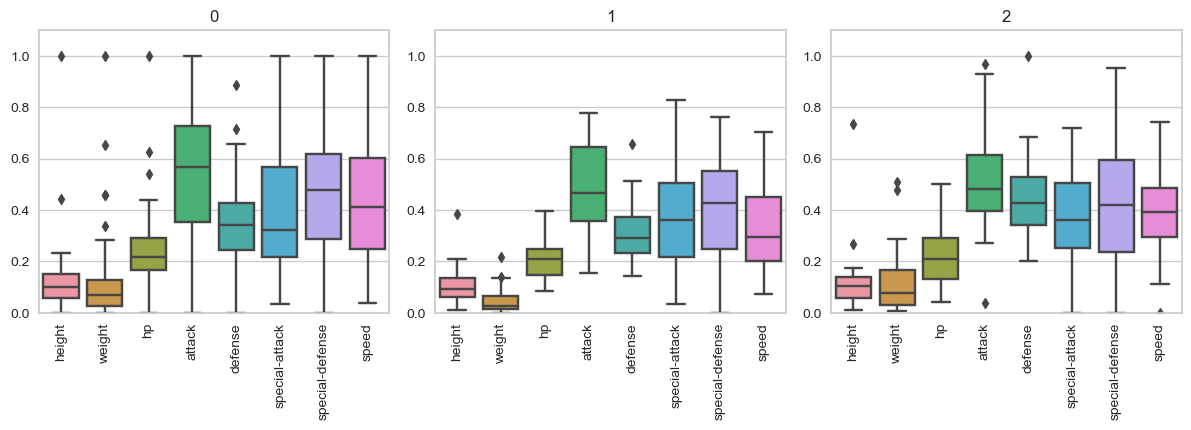

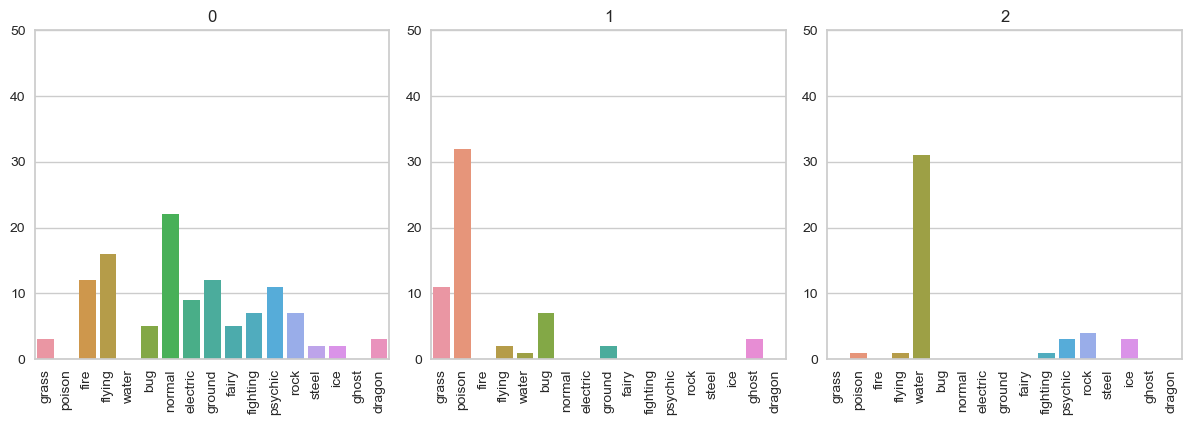

Cluster  0  wird angezeigt: 


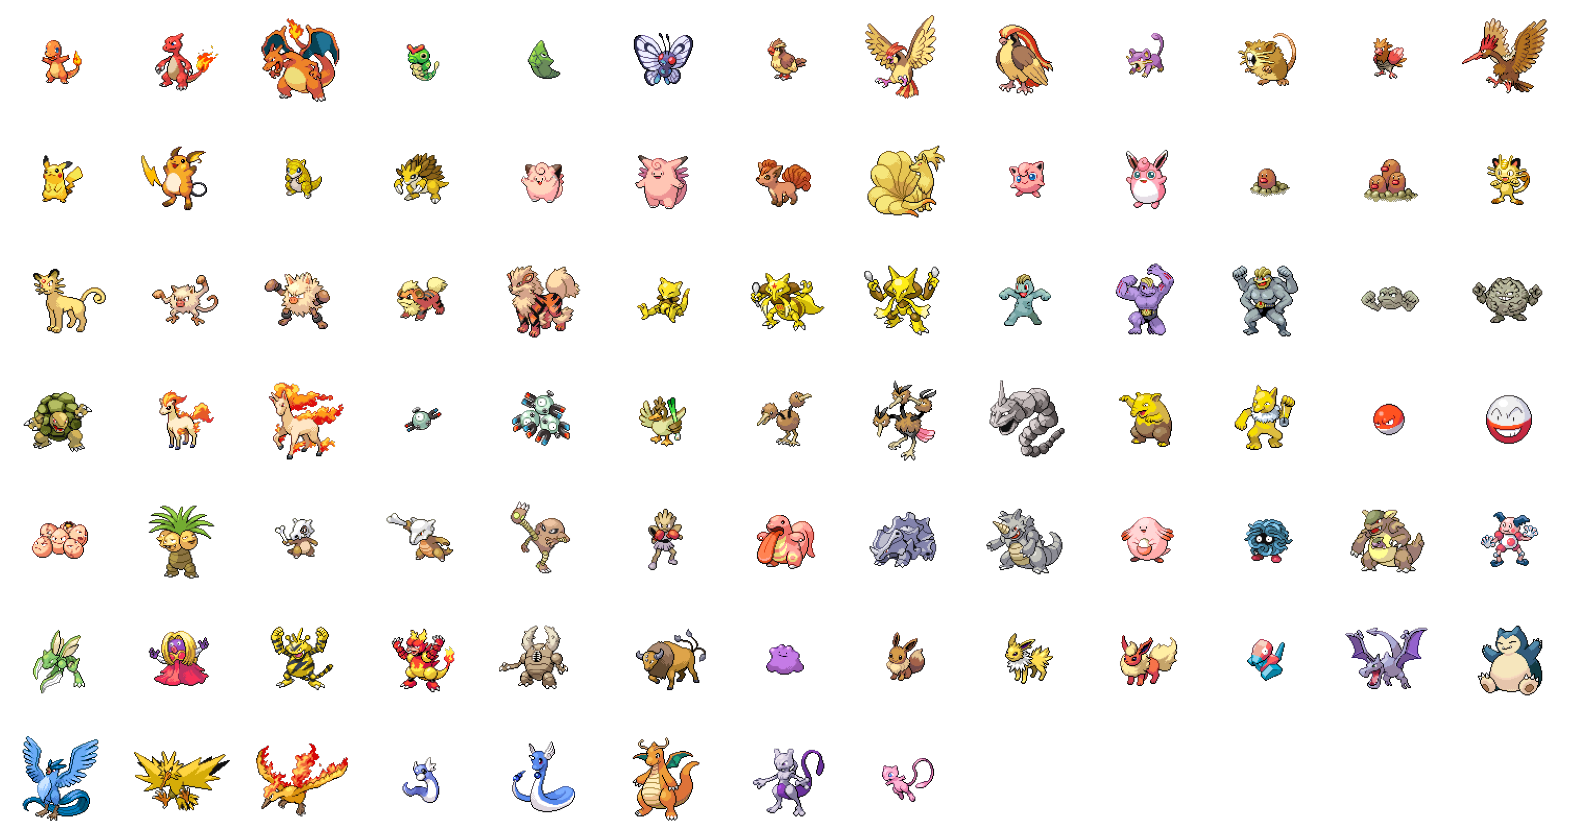

Cluster  1  wird angezeigt: 


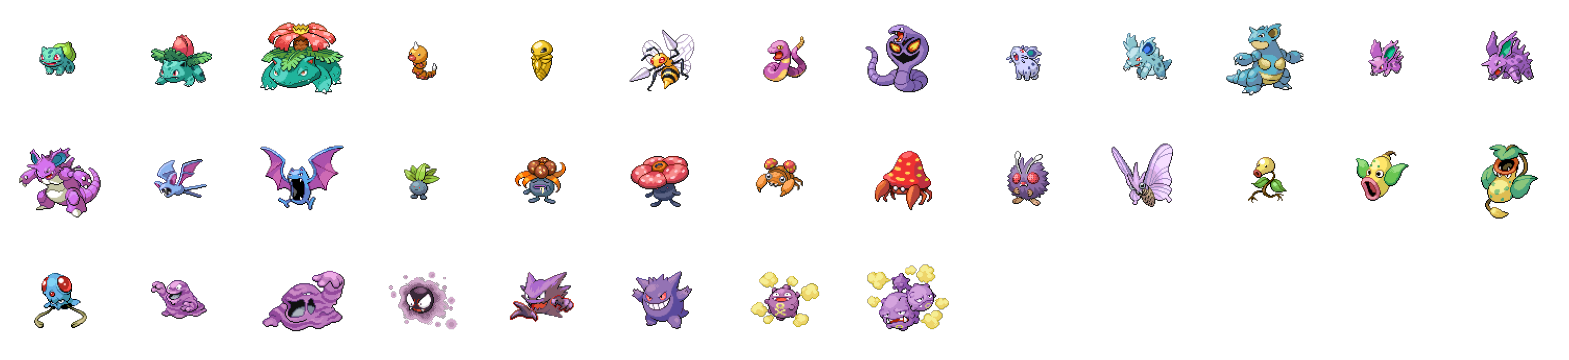

Cluster  2  wird angezeigt: 


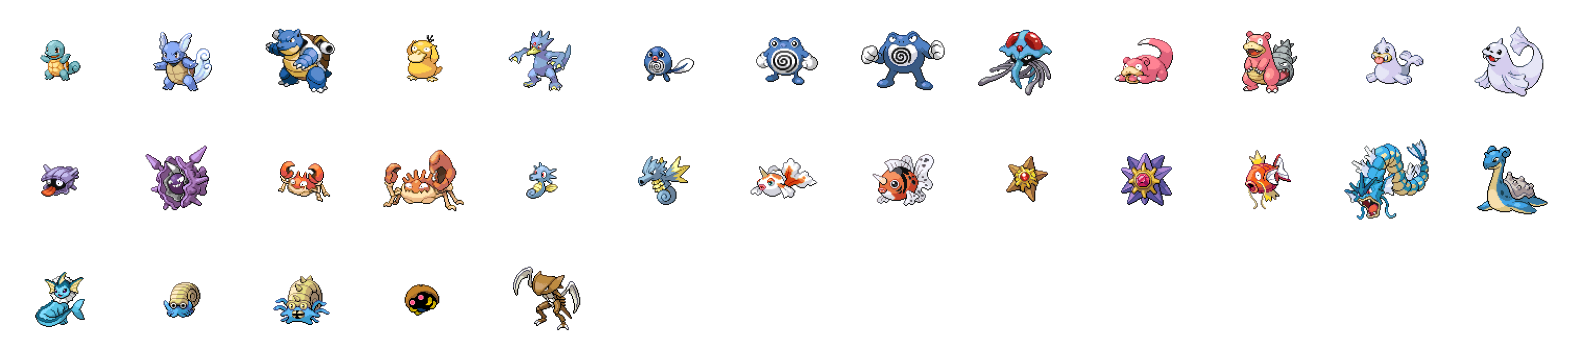

In [228]:
cluster_dict = kmeans(scaled_df, 3)
compare_cluster(cluster_dict)

##### **Aufgabe 11**:

1. Visualisiert euch die PCA für **numerische und kategorische Werte**. Wie viele Cluster erwartet ihr zu finden? 
2. Wendet den KMeans-Algorithmus mit dieser Anzahl auf die Daten an. Entspricht das Clustering euren Erwartungen?
3. Was ist für euch subjektiv gesehen eine optimale Anzahl an Clustern?
4. Analysiert und diskutieren die gefundenen Cluster mit den implementierten Methoden. Welche Merkmale oder Arten von Merkmalen haben eurer Meinung nach den größten Einfluss auf das Clustering?
5. Optional: Beschreibt die gefundenen Cluster mit einer kurzen Zusammenfassung, z.B. "Cluster 1: Große blaue Dreiecke".

In [229]:
num_and_cat = scaled_df
reduced_num_and_cat = apply_pca(num_and_cat)

___
1:

In [230]:

plot_pca_data(reduced_num_and_cat)

Für uns sind hier gerade 5 Cluster zu erkennen.

___
2:

In [231]:
num_and_cat_cluster = kmeans(reduced_num_and_cat, 5)

Diese Einteilung ist fast genau, wie wir sie aus dem Plot davor uns vorgestellt haben.
___
3:<br>
Eine optimale Anahl an Clustern ist rein visueal für uns eben 5. Wir könnten uns auch vorstellen, dass man die Zahl der am meisten vertretenen Types (absehbar Aus aufgabe 7) als Cluster Zahl nimmt, aber ob das Optimal ist übersteigt unser Wissen. Die Zahl kommt den 5 Clustern aufjedenfall nahe (Nach unserer Auswahl: Poison, Flying, Water, Normal und "Andere").

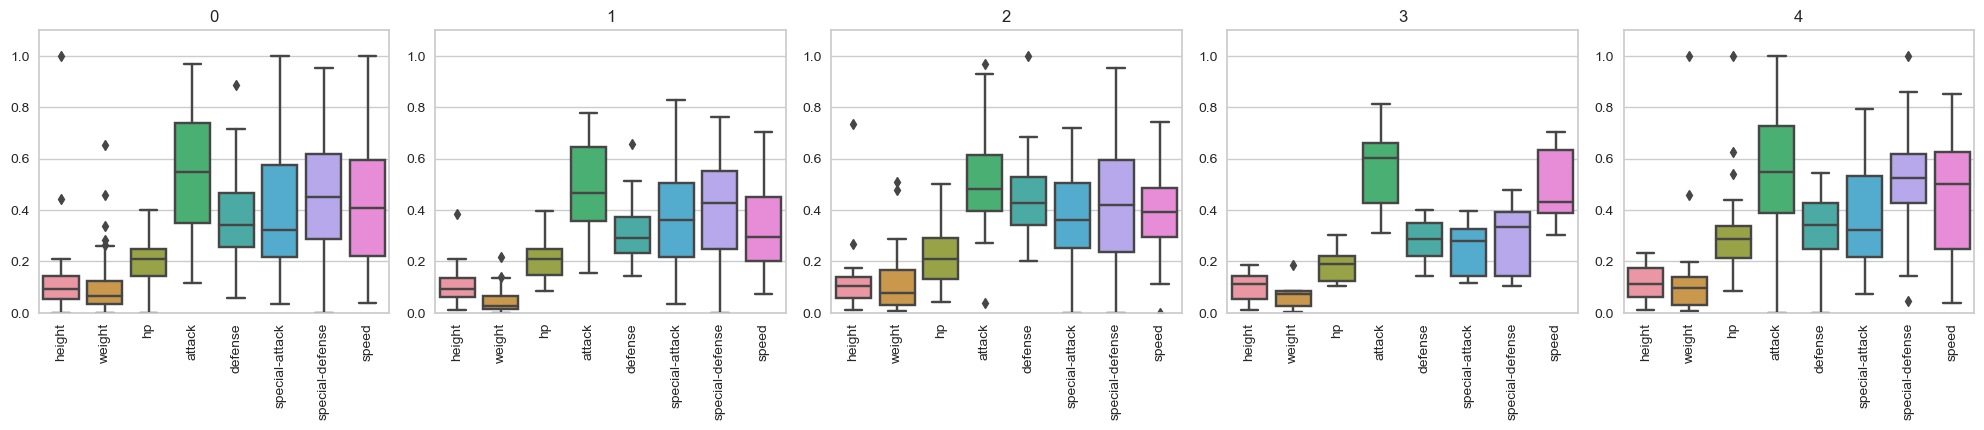

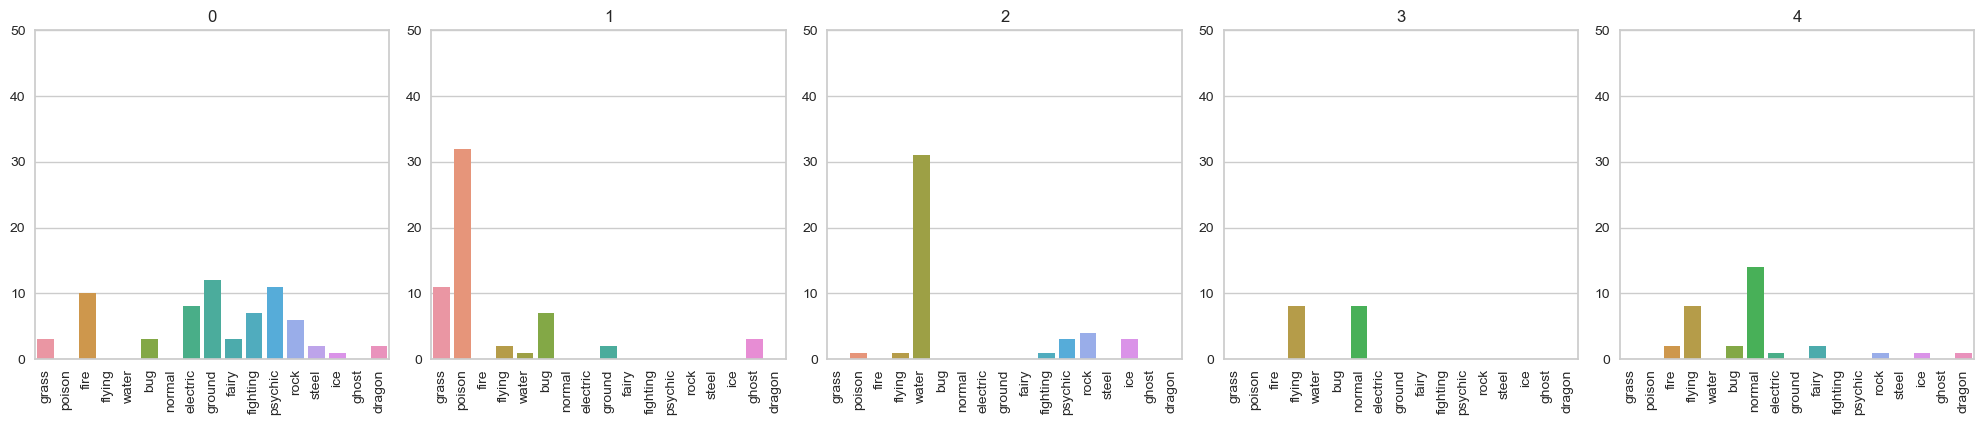

Cluster  0  wird angezeigt: 


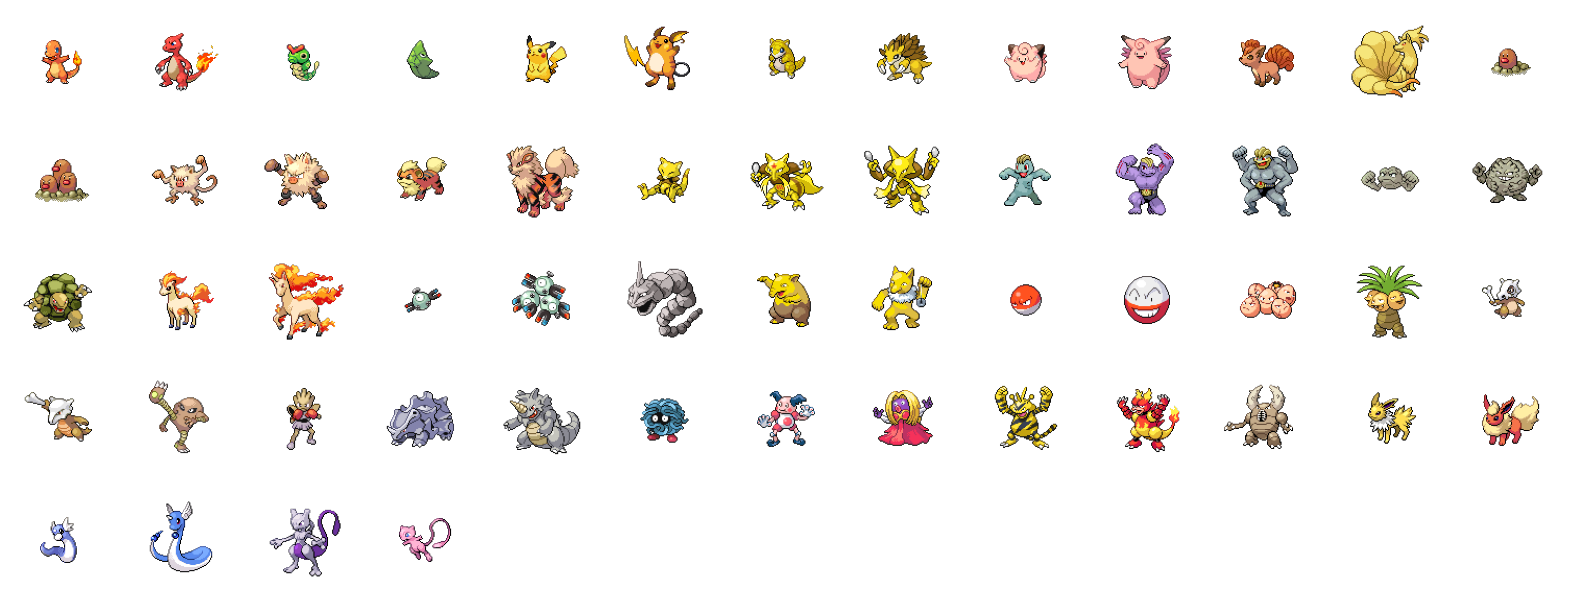

Cluster  1  wird angezeigt: 


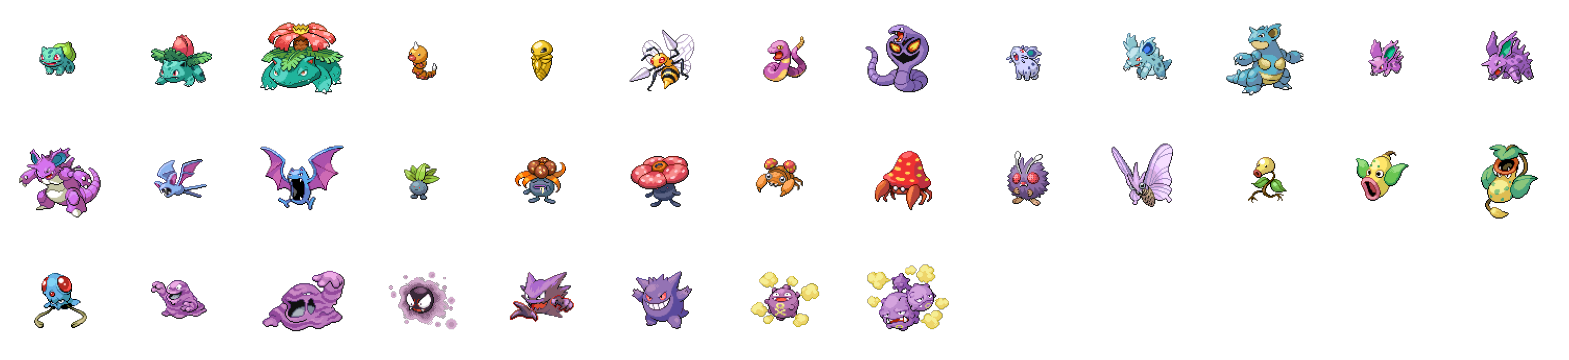

Cluster  2  wird angezeigt: 


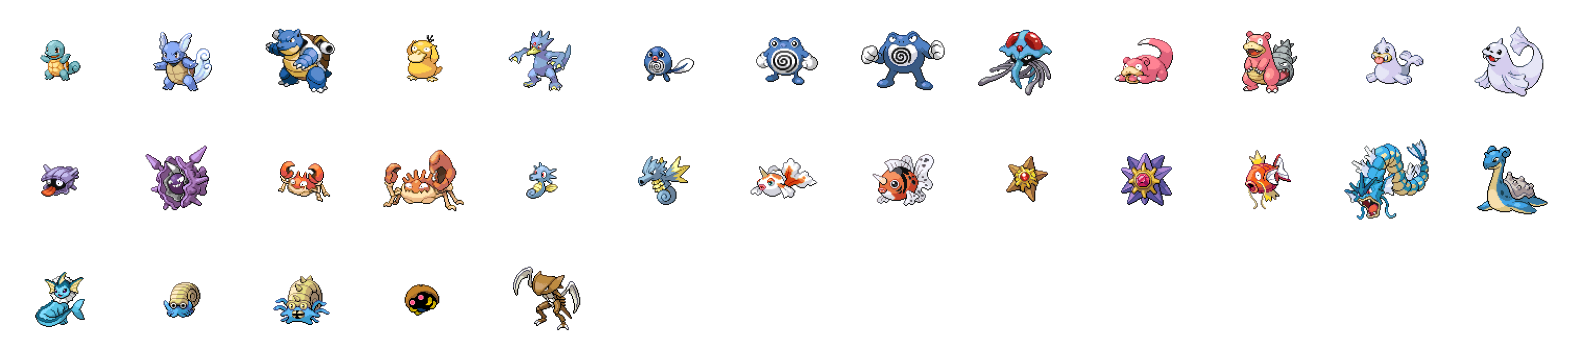

Cluster  3  wird angezeigt: 


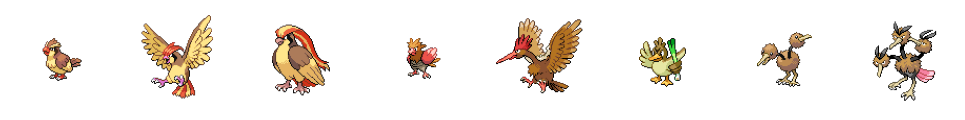

Cluster  4  wird angezeigt: 


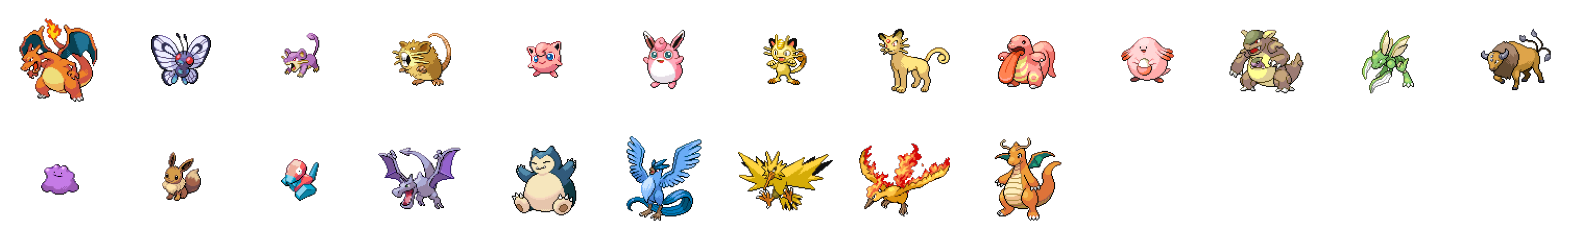

In [232]:
compare_cluster(num_and_cat_cluster)

Auffällig ist, dass die Evolutionsstufen des selben Pokemons auch meistens im selben Cluster landen. <br>
Cluster 1 und Cluster 2 sind jeweils klar durch die Types "Poison" und "Water" dominiert. <br>
Cluster 3 und 4 beinhalten beide "Flying" und "Normal" zu ähnlichen Anteilen. Aber aus dem PCA-Cluster-Plot sieht man auch, dass die beiden Gruppen aufjedenfall in verschiedenen Clustern landen würden. Cluster 3 enthält tatsächlich **nur** "Flying" und "Normal".<br>
Cluster 0 scheint "die Übrigen" zu enthalten, da hier beim Boxplot eine relativ große Spanne an Stat-Werten zu sehen ist, besonders bei Attack, Special-Defense und Special-Attack. Auch sind hier keine der "Types" zu finden welche die Überzahl in den anderen Clustern bilden.

**Aufgabe 12**:

1. Visualisiert euch die PCA nur für **numerische Werte**. Wie viele Cluster erwartet ihr zu finden? 
2. Wendet den KMeans Algorithmus mit dieser Anzahl auf die Daten an. Entspricht das Clustering euren Erwartungen?
3. Was ist für euch subjektiv gesehen eine optimale Anzahl an Clustern?
4. Analysiert und diskutieren die gefundenen Cluster mit den implementierten Methoden. Welche Merkmale oder Arten von Merkmalen haben eurer Meinung nach den größten Einfluss auf das Clustering?
5. Vergleicht die Ergebnisse mit denen aus Versuch 10.
5. Optional: Beschreibt die gefundenen Cluster mit einer kurzen Zusammenfassung, z.B. "Cluster 1: Kleine rote Kreise".

In [233]:
num_feat = scaled_df.iloc[:, :8].copy()
reduced_num_df = apply_pca(num_feat)
print("Für numerische Werte: ")
plot_pca_data(reduced_num_df)

Für numerische Werte: 


Für uns sind hier keine Cluster ersichtlich. Wenn man die Augen zusammen kneift, kann man vielleicht 2 Cluster ausmachen. Grob um (0,-0.25) und um (0,0.25) senkrecht geteilt leicht links von der 0-Achse.

___
2:

In [234]:
num_cluster = kmeans(reduced_num_df, 2)

Dieses Clustering entspricht exakt unseren Erwartungen.
___
3:<br>
Wir können uns hier abgesehen vom Ablesen der 2 Cluster aus dem PCA-Plot keine andere Clusterzahl als Optimal vorstellen. Vielleicht fehlt uns hier auch Wissen über Pokemon, um aus anderen Eigenschaften eine Zahl herzuleiten. Größere Zahlen produzieren Cluster, die für uns beinahe zufällig generiert aussehen. (Was durch die relativ homogene Dichte aller Datenpunkte und der Initialisierung des KMeans Algorithmus vielleicht sogar der fall ist.)
___
4:

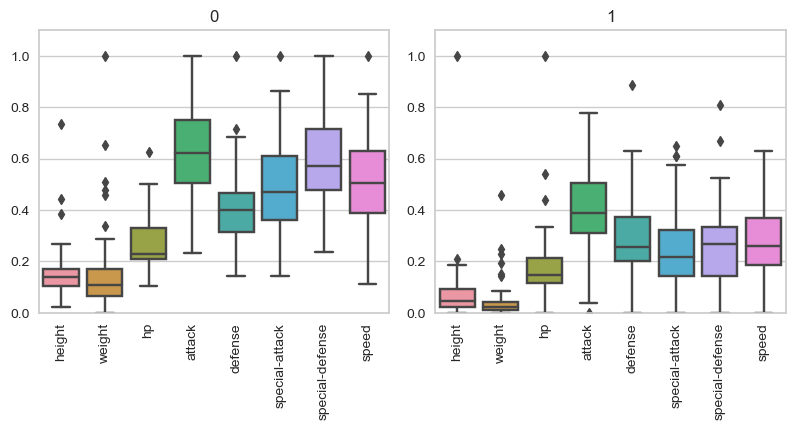

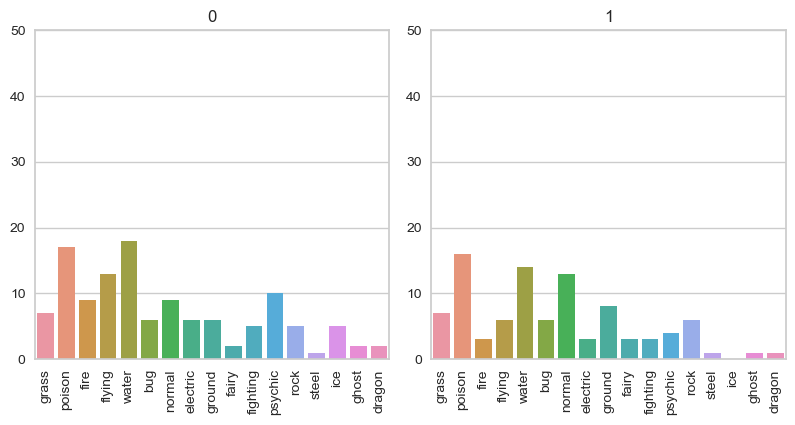

Cluster  0  wird angezeigt: 


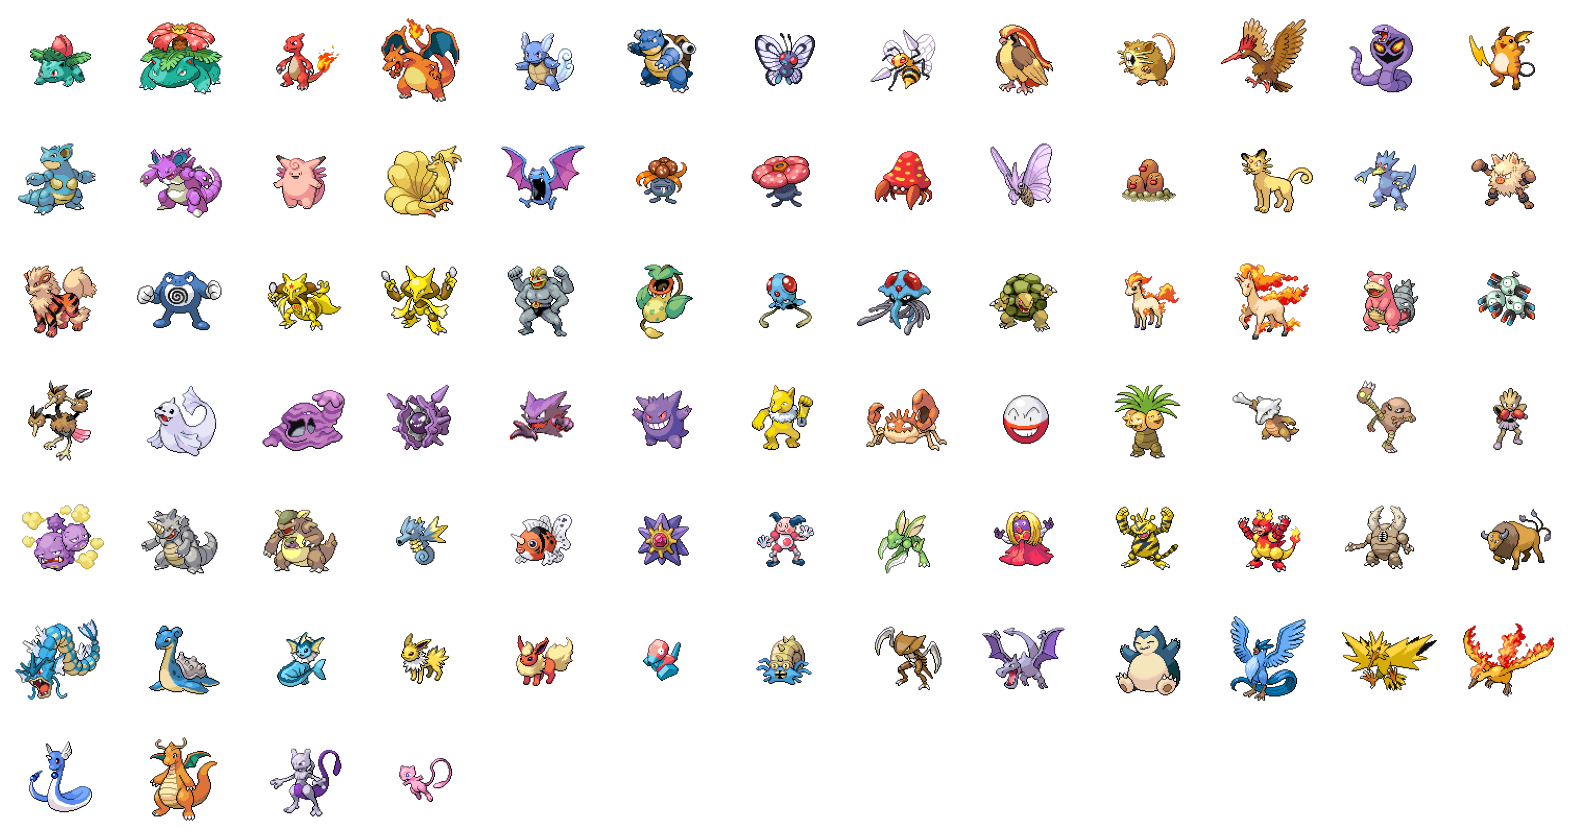

Cluster  1  wird angezeigt: 


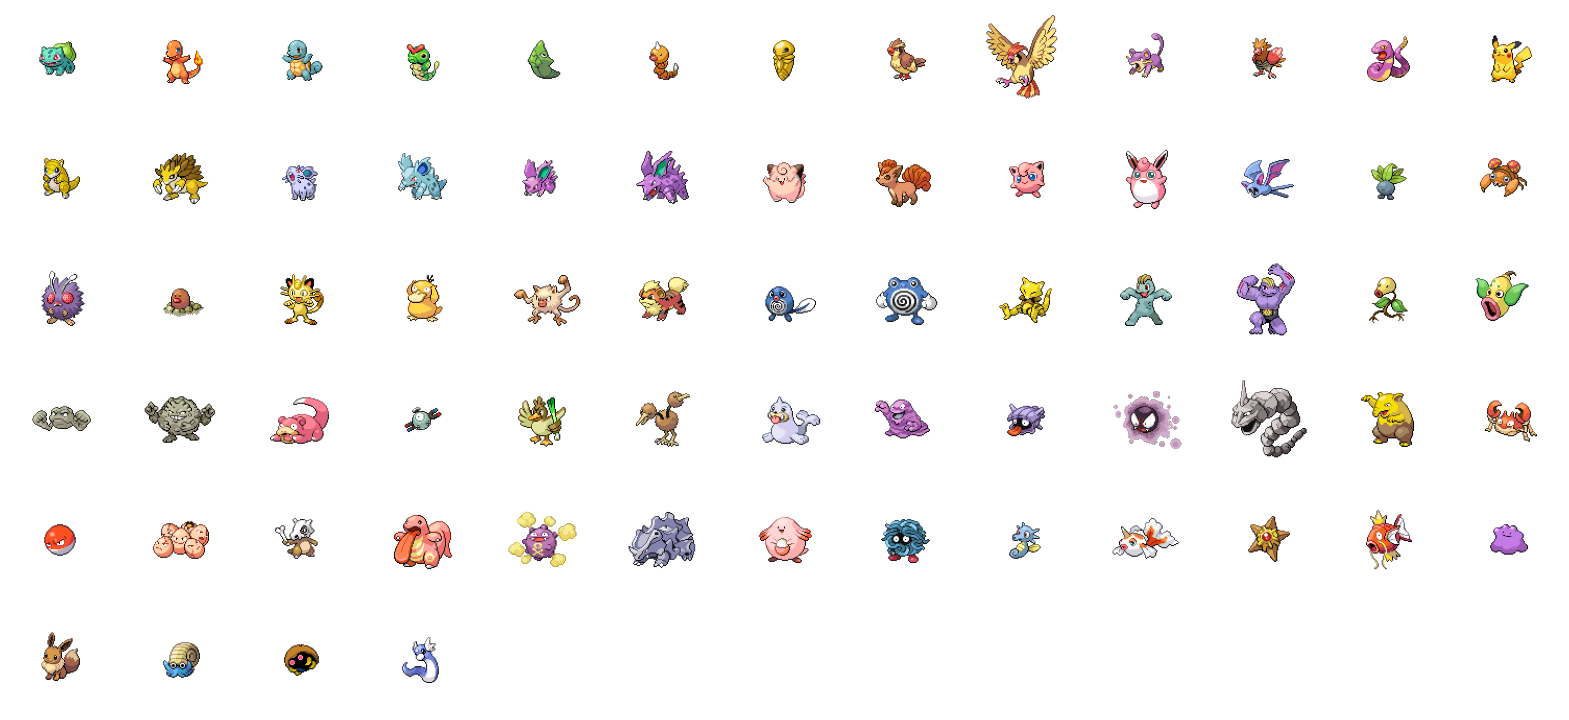

In [235]:
compare_cluster(num_cluster)

Die Pokemon sind hier deutlich zwischen "groß und stark" und "klein und schwach" aufgeteilt. Sowohl die Bilder als auch die Boxplots lassen das ablesen. So überschneiden sich zum Beispiel die Bereiche der Weight-Boxen garnicht und Special-Defense ist in Cluster 0 deutlich höher.
Cluster 0 ist Cluster 1 in jedem Stat überlegen. <br>
Die Aufteilung der Types ist unauffällig, vielleicht sogar eher auffällig ähnlich.

___
5:<br>

Die rein numerischen Werte lassen sich schlecht in Cluster einteilen.<br>
Aber das muss nicht unbedingt verwundern, da unserem Verständnis nach, die kategorischen Absolut-Werte 1 und 0 der Types im Vergleich zu den anderen Werten, welche typischer weise *zwischen* 1 und 0 liegen (gegeben, es wurde bereits skaliert), stark charakterisierend sind. <br>
So kann man ein Pokemon eindeutig als Typ Water erkennen und auch so zuteilen, wohingegen die HP nur eine Position auf einem Spektrum wiedergeben. 
Deshalb lassen sich auch die Gruppierung in Types in den Ergebnis-Clustern der Aufgabe 11 finden.

**Aufgabe 13:**

1. Berechnet für die gefundenen Cluster aus Aufgabe 11 und/oder 12 die [Elbow Methode](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) und den [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).
2. Was genau berechnet die Elbow Methode und der Silhouette Score?
3. Passen die Scores zu eurer bisherigen Interpretationen?

In [236]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#### Für alle Merkmale:

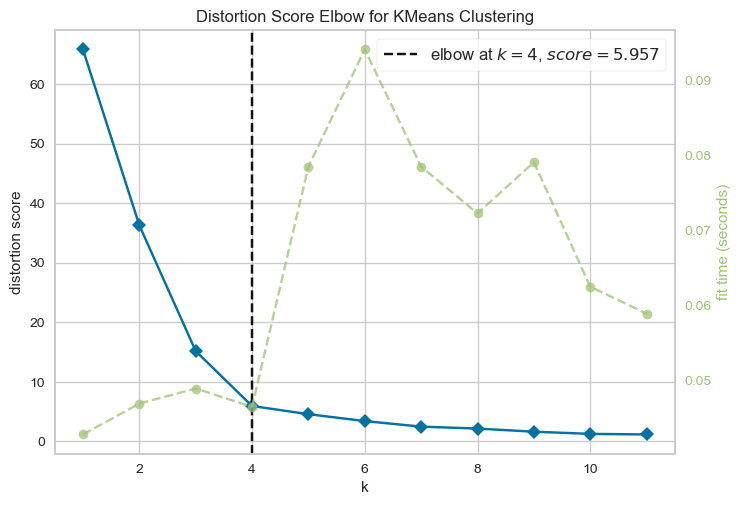

In [237]:
model = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(reduced_num_and_cat)
visualizer.show();

In [238]:

range_n_clusters = [2,3,4,5,6,7,8,9,10]
scores1 = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    preds = clusterer.fit_predict(reduced_num_and_cat) 
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(reduced_num_and_cat, preds)
    scores1.append(score)

print(f"Max Score: {max(scores1)}")   


Max Score: 0.7200760932869436


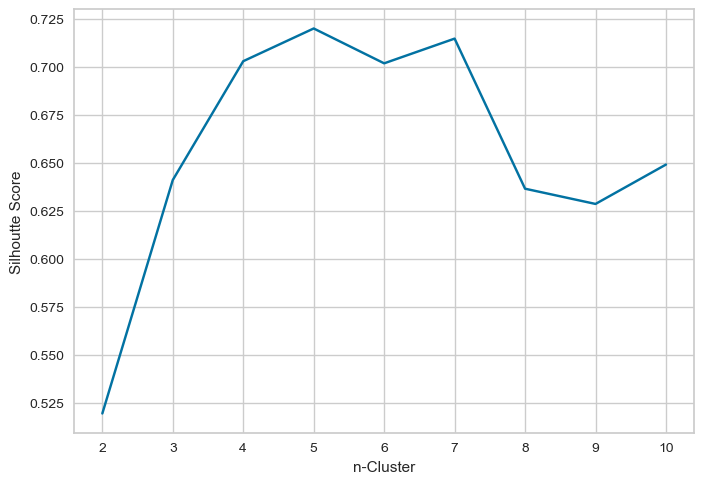

In [239]:
x_values = np.linspace(2, 10, len(scores1))
plt.xlabel('n-Cluster')
plt.ylabel('Silhoutte Score')
plt.plot(x_values,scores1);

Wir hatten 5 Cluster gewählt und der Silhoutte Score unterstützt dies mit einem Maximum bei 5. Die Elbow Methode hält 4 für Optimal.


#### Für numerische Merkmale:

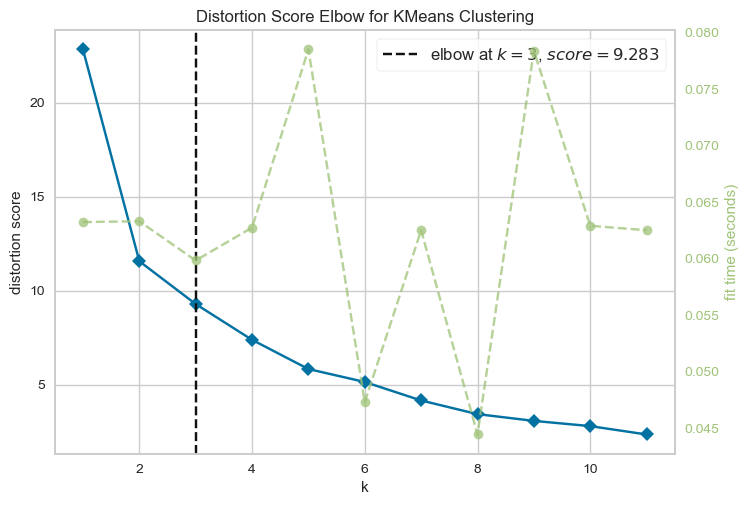

In [240]:
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(reduced_num_df)
visualizer.show();


In [241]:
scores = []
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    preds = clusterer.fit_predict(reduced_num_df) 
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(reduced_num_and_cat, preds)
    scores.append(score)

print(f"Max Score: {max(scores)}")

Max Score: 0.008007676429455013


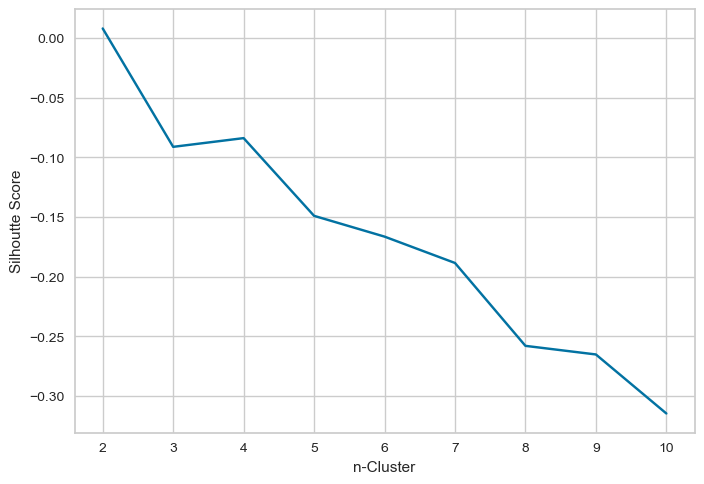

In [242]:
x_values = np.linspace(2, 10, len(scores))
plt.xlabel('n-Cluster')
plt.ylabel('Silhoutte Score')
plt.plot(x_values,scores);

Die Elbow Methode schlägt uns für die rein numerischen Merkmale eine Zahl von 3 vor. Um auch n=2 eine Chance zu geben der Elbow zu sein, lassen wir auch die Zahl 1 zu. So gibt uns der Graph aber visuell ebenso bei 2 den stärksten Knick/Elbow. Sagt aber algorithmisch die 3 sei optimal.<br>
Der Silhoutte Score gibt auch 2 Clustern einen sehr schlechten Score, aber dieser ist dennoch viel besser als dieser für eine höhere Anzahl an Clustern.

___
2:<br>
##### Elbow-Methode: <br>

Die Elbow-Methode gibt uns die Zahl der Cluster zurück, ab der eine Höhere Anzahl an Clustern ein vernachlässigbare verbesserung der "Verzerrung" führt. Verzerrung ist hier die Summe der quadrierten Distanzen aller Punkte zum zugehörigen Cluster.

##### Silhoutte Score:

*von https://scikit-learn.org/ gelernt:*

Der Silhoutte Score berechnet sich wie folgt:<br>

Wir haben einen Datenpunkt **P** und berechnen dessen Silhouettenkoeffizient. <br>
Sei **a** der durchschnittliche Abstand von **P** zu allen anderen Datenpunkten des selben Clusters.<br>
Sei **b** der durchschnittliche Abstand zu Zentrum des nächsten Clusters, dem **P** nicht angehört.<br>
Die Differenz **b** **-** **a** wird durch **a** oder **b**, entschieden durch welcher Wert gößer ist, geteilt.<br>
Der durschnittliche Silhouettenkoeffizient aller Datenpunkte bildet den Silhoutte Score. <br>

Also ist der Silhoutte Score eine eigene Metrik, welche ein Clustering von -1 bis 1 bewertet, wobei 1 der beste Wert ist.

___
3:<br>
Wie in 13.1 schon beschrieben, liegen beide Scores unseren Interpretationen sehr nahe und auch die Elbow Methode unterstütz unsere Vermutungen.

**Aufgabe 14: (Verständnisfragen)**

1. Was ist die maximale Anzahl an möglichen Clustern, wenn die numerischen Werte Teil des Dataframes sind?
2. Was ist die maximale Anzahl an möglichen Clustern, wenn nur die kategorischen Daten verwendet würden?
3. Wie beurteilt ihr die Verwendung von kategorischen Merkmalen im Clustering? Konnten dadurch Cluster gefunden werden, die ihr ohne die Hilfe des Algorithmus nicht so einfach gefunden hättet?
4. Wie beurteilen Sie die Verwendung von numerischen Merkmalen im Clustering? Konnten dadurch Cluster gefunden werden, die ihr ohne die Hilfe des Algorithmus nicht so einfach gefunden hättet?

Begründet eure Antworten entweder theoretisch (nur Text) und/oder optional auch empirisch (mit Code).

___
1:<br>

Allgemein:<br>
Die maximale Anzahl an möglichen Clustern ist die Anzahl an einzigartigen Einträgen, hier also 151.(Angenommen Cluster können nicht leer sein und Datenpunkte können immer nur einem Cluster angehören)


Bei z.B. DBSCAN könnten andere Bedingungen gelten, da die minimale Clustergröße hier von MinPoints abhängt.

In [243]:
beweis_cluster = kmeans(reduced_num_df, 151)

In [244]:
beweis_cluster2 = kmeans(reduced_num_df, 152)

ValueError: n_samples=151 should be >= n_clusters=152.

___
2:

Es gibt 17 Typen, ein Pokemon kann maximal 2 Typen haben, also ist die maximale Anzahl von unterschiedlichen Datenpunkten gleich aller möglichen Kombinationen von Typen (17 * 17 = 289) und nach unserer Folgerung aus 1. auch die maximalzahl an Clustern.

___
3:

Die Verwendung kategorischer Merkmale hat die Clusterfindung stark vereinfacht, sowohl für uns, als auch für KMeans (laut Silhouette Score). (Vergleich aufgabe 11 und 12)<br>
Einerseits überschatten diese vielleicht die numerischen Werte, jedoch unterstreicht das eben ihre wichtigkeit für "eindeutigere" Kategorisierungen. <br> 
Weiterhin könnten kategorische Merkmale offensichtliche Information reproduzieren, welche auch aus einer einfachen Tabelle ablesbar wäre (Alle Wasserpokemon sind vom Typ Wasser :o ) und somit neue Erkenntnisse unterdrücken (z.B. "Pokemon mit viel Defense sind meist vom Typ Wasser").

___
4:

Numerische Merkmale lassen eine feinere Unterteilung zu, vielleicht eben unter Daten mit den selben kategorischen Merkmalen. <br>
Sie machen eine eindeutige Ordnung schwerer, aber genau deshalb können sie für neue Erkenntnisse sorgen. (analog zu 3.)

Also ist wohl allgemein eine Verwendung beider Merkmale als optimal zu betrachten.
